# PROJECT TEAM ID : PTID-CDS-OCT-24-2098
## PROJECT ID     : PRCP-1007-LiverPatientPred
## PROJECT NAME  : Liver Patient Prediction 

# Business Problem: Predicting Liver Disease Risk for Early Intervention

The goal is to develop a machine learning model that predicts the likelihood of a patient developing liver disease based on various health parameters (e.g., age, gender, liver enzyme levels, and bilirubin levels). Early identification of at-risk individuals allows healthcare providers to intervene sooner, offering treatments or lifestyle modifications that could prevent the progression of liver disease. 

This can significantly reduce healthcare costs, improve patient outcomes, and enable better resource management in hospitals and clinics.


## Domain Analysis

1. **Age of the Patient**: The age of the patient, usually measured in years, which may have an impact on the likelihood of liver disease.

2. **Gender of the Patient**: The gender of the patient, which can sometimes be linked to different risk factors or outcomes in liver disease (e.g., males may be more prone to certain liver conditions).

3. **Total Bilirubin**: A measure of the total bilirubin in the blood, a substance produced by the breakdown of red blood cells. Elevated levels can indicate liver dysfunction or disease.

4. **Direct Bilirubin**: The amount of conjugated bilirubin in the blood, which is processed by the liver. High levels can be a sign of liver diseases, such as hepatitis or cirrhosis.

5. **Alkaline Phosphatase**: An enzyme found in the liver, bones, kidneys, and bile ducts. High levels can indicate liver disease or blockage of bile flow.

6. **Alanine Aminotransferase (ALT)**: An enzyme primarily found in the liver. Elevated ALT levels are often a marker of liver damage or disease.

7. **Aspartate Aminotransferase (AST)**: An enzyme found in the liver, heart, and muscles. Like ALT, high levels of AST in the blood can suggest liver damage.

8. **Total Proteins**: The sum of all proteins in the blood, including albumin and globulins. Low levels may indicate liver disease, as the liver is responsible for protein production.

9. **Albumin**: A protein made by the liver. Low levels of albumin can be a sign of liver disease or other conditions such as kidney disease.

10. **Albumin and Globulin Ratio**: A ratio of albumin (a liver-produced protein) to globulins (a group of proteins involved in immune function). A lower ratio may indicate liver disease.

11. **Target**: The classification field that splits the data into two groups—patients with liver disease (1) and those without liver disease (2). This target is typically used for classification problems in machine learning to predict the presence of liver disease.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# **Data Load**

In [2]:
data=pd.read_csv("Indian Liver Patient Dataset (ILPD).csv",header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [3]:
# Define column names
columns = [
     'age', 'gender', 'total_bilirubin', 'direct_bilirubin',
    'alkaline_phosphatase', 'alanine_aminotransferase',
    'aspartate_aminotransferase', 'total_proteins',
    'albumin', 'albumin_globulin_ratio', 'liver_disease'
]

# Assign the column names to the Data
data.columns = columns


# **Basic Checks**

In [4]:
data.head()

,age,gender,total_bilirubin,direct_bilirubin,alkaline_phosphatase,alanine_aminotransferase,aspartate_aminotransferase,total_proteins,albumin,albumin_globulin_ratio,liver_disease
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [5]:
data.tail()

,age,gender,total_bilirubin,direct_bilirubin,alkaline_phosphatase,alanine_aminotransferase,aspartate_aminotransferase,total_proteins,albumin,albumin_globulin_ratio,liver_disease
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1
582,38,Male,1.0,0.3,216,21,24,7.3,4.4,1.50,2


In [6]:
data.shape

(583, 11)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age                         583 non-null    int64  
 1   gender                      583 non-null    object 
 2   total_bilirubin             583 non-null    float64
 3   direct_bilirubin            583 non-null    float64
 4   alkaline_phosphatase        583 non-null    int64  
 5   alanine_aminotransferase    583 non-null    int64  
 6   aspartate_aminotransferase  583 non-null    int64  
 7   total_proteins              583 non-null    float64
 8   albumin                     583 non-null    float64
 9   albumin_globulin_ratio      579 non-null    float64
 10  liver_disease               583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [8]:
data.describe()

,age,total_bilirubin,direct_bilirubin,alkaline_phosphatase,alanine_aminotransferase,aspartate_aminotransferase,total_proteins,albumin,albumin_globulin_ratio,liver_disease
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


### 1. **Age**:
   - Ages range from 4 to 90 years, with a mean of 44.75 years, showing a broad distribution.

### 2. **Total Bilirubin**:
   - Bilirubin levels vary widely (0.4 to 75 mg/dL) with a mean of 3.30 mg/dL, indicating some outliers.

### 3. **Direct Bilirubin**:
   - Direct bilirubin ranges from 0.1 to 19.7 mg/dL, with a mean of 1.49 mg/dL, showing considerable variation.

### 4. **Alkaline Phosphatase**:
   - Values range from 63 to 2110 IU/L, with a mean of 290.58 IU/L, reflecting high variability.

### 5. **Alanine Aminotransferase (ALT)**:
   - ALT values range from 10 to 2000 IU/L, with a mean of 80.71 IU/L, suggesting significant variation in liver function.

### 6. **Aspartate Aminotransferase (AST)**:
   - AST levels range from 10 to 4929 IU/L, with a mean of 109.91 IU/L, indicating possible liver injury in some cases.

### 7. **Total Proteins**:
   - Total protein levels range from 2.7 to 9.6 g/dL, with a mean of 6.48 g/dL, showing typical protein variability.

### 8. **Albumin**:
   - Albumin ranges from 0.9 to 5.5 g/dL, with a mean of 3.14 g/dL, with some individuals showing low levels possibly indicating liver dysfunction.

### 9. **Albumin/Globulin Ratio**:
   - The ratio ranges from 0.3 to 2.8, with a mean of 0.95, reflecting typical protein balance, with some low values suggesting liver issues.

### 10. **Liver Disease**:
   - The mean is 1.29, indicating that most individuals do not have liver disease, as the values are closer to 1 (no disease) than 2 (disease).


# **Exploratory Data Analysis**
## Univarient Analysis

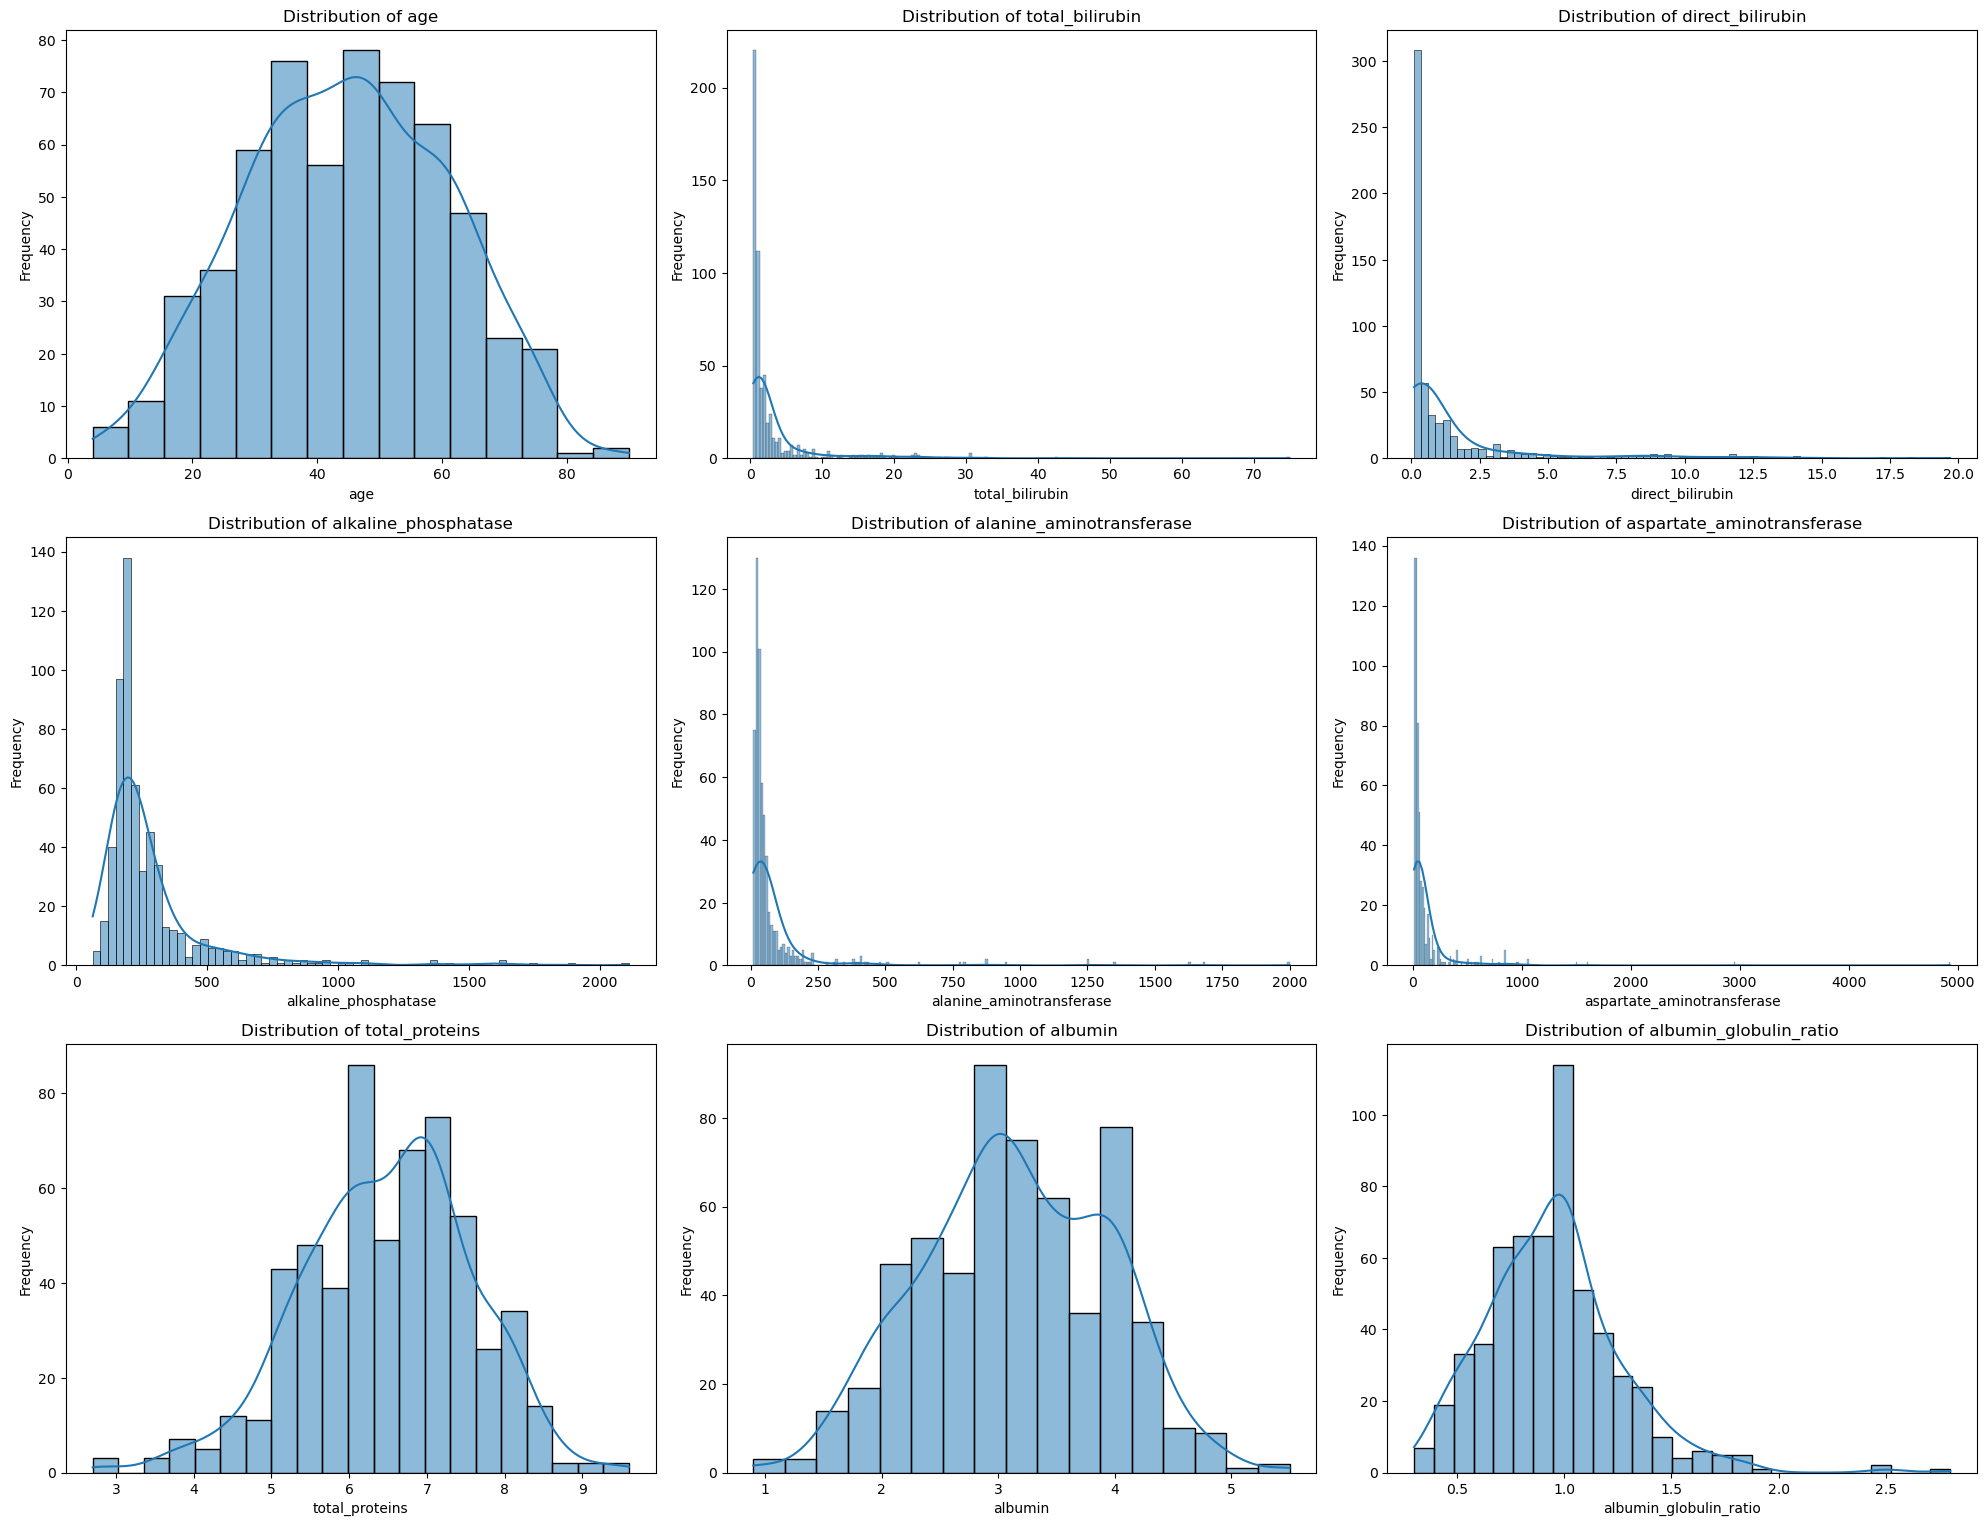

In [9]:
plt.figure(figsize=(20, 20))

plotnumber = 1

for column in data.columns:
    if column != 'liver_disease' and data[column].dtype in ['int64', 'float64'] and plotnumber <= 9:
        plt.subplot(4, 3, plotnumber)
        sns.histplot(data[column], kde=True,line_kws={'color': 'red'})
        plt.title(f'Distribution of {column}', fontsize=12)
        plt.xlabel(column, fontsize=10)
        plt.ylabel('Frequency', fontsize=10)

        plotnumber += 1 

plt.tight_layout()
plt.show()

### 1. **Age**:
   - **Histogram**: The age distribution is approximately **bell-shaped**, with most individuals falling between 30 and 60 years. There are fewer very young (under 10) and older (over 80) individuals.
   - **KDE Line**: The KDE line closely follows the histogram, confirming the **central tendency** around 45 years, indicating that most of the population is middle-aged.

### 2. **Total Bilirubin**:
   - **Histogram**: The distribution of **total bilirubin** is **right-skewed**, with the majority of values concentrated below 5 mg/dL. There are a few individuals with extremely high levels (outliers), possibly indicating liver dysfunction or jaundice.
   - **KDE Line**: The KDE line shows a **peak near the lower values** (around 1-3 mg/dL), confirming a higher frequency of individuals with normal or slightly elevated bilirubin levels, with a long tail on the higher side.

### 3. **Direct Bilirubin**:
   - **Histogram**: The direct bilirubin distribution also shows **right skewness**. Most values are clustered near the lower end (below 1.5 mg/dL).
   - **KDE Line**: The KDE line suggests that while most individuals have **normal levels**, there are a few with much higher values, which might indicate liver or bile duct issues.

### 4. **Alkaline Phosphatase**:
   - **Histogram**: **Alkaline phosphatase** levels are highly **right-skewed**, with most values falling between 100 and 400 IU/L.
   - **KDE Line**: The KDE line shows a **sharp peak** near the lower range (100-300 IU/L), with a **long right tail** suggesting that some individuals have much higher levels, possibly pointing to liver disease or bone issues.

### 5. **Alanine Aminotransferase (ALT)**:
   - **Histogram**: The **ALT** distribution is **right-skewed**, with the majority of values falling between 10 and 100 IU/L, but there are some extreme outliers above 1000 IU/L.
   - **KDE Line**: The KDE line shows a peak around 30-60 IU/L, with **significant right-skew**. Elevated ALT levels can indicate liver damage, particularly in cases of viral hepatitis or fatty liver disease.

### 6. **Aspartate Aminotransferase (AST)**:
   - **Histogram**: **AST** levels are also **right-skewed**. Most of the values are concentrated below 100 IU/L, with a few individuals showing much higher levels (500+ IU/L).
   - **KDE Line**: The KDE line shows a prominent peak around lower AST values, with a **tail towards higher values**, suggesting liver damage or other issues in individuals with elevated AST levels.

### 7. **Total Proteins**:
   - **Histogram**: The **total proteins** histogram is relatively **symmetrical** with most values between 5-8 g/dL, suggesting a healthy population with typical protein levels.
   - **KDE Line**: The KDE line confirms this symmetrical distribution, with **slight peaks around 6 and 7 g/dL**, indicating the general range of protein levels.

### 8. **Albumin**:
   - **Histogram**: The **albumin** distribution has a peak between 3 and 4 g/dL, with a smaller proportion of individuals showing lower levels, which could indicate liver or kidney dysfunction.
   - **KDE Line**: The KDE line is slightly **skewed left**, confirming that most individuals have normal albumin levels, but those with lower albumin may be at risk for liver disease or malnutrition.

### 9. **Albumin/Globulin Ratio**:
   - **Histogram**: The **albumin/globulin ratio** histogram is **centered around 1**, indicating that the protein balance between albumin and globulin is typical for most individuals.
   - **KDE Line**: The KDE line shows a **sharp peak around 1**, with a slight drop on the lower side, indicating that values below 1 could signal liver or kidney issues.

### 10. **Liver Disease**:
   - **Histogram**: The **liver disease** variable is binary (1 for no disease and 2 for disease), so the histogram will have two peaks. The **majority of the population** falls under category 1 (no liver disease).
   - **KDE Line**: The KDE line for this variable shows two distinct peaks, one at **1** (no liver disease) and one at **2** (liver disease). The distribution is almost bimodal, indicating a balanced dataset between individuals with and without liver disease.


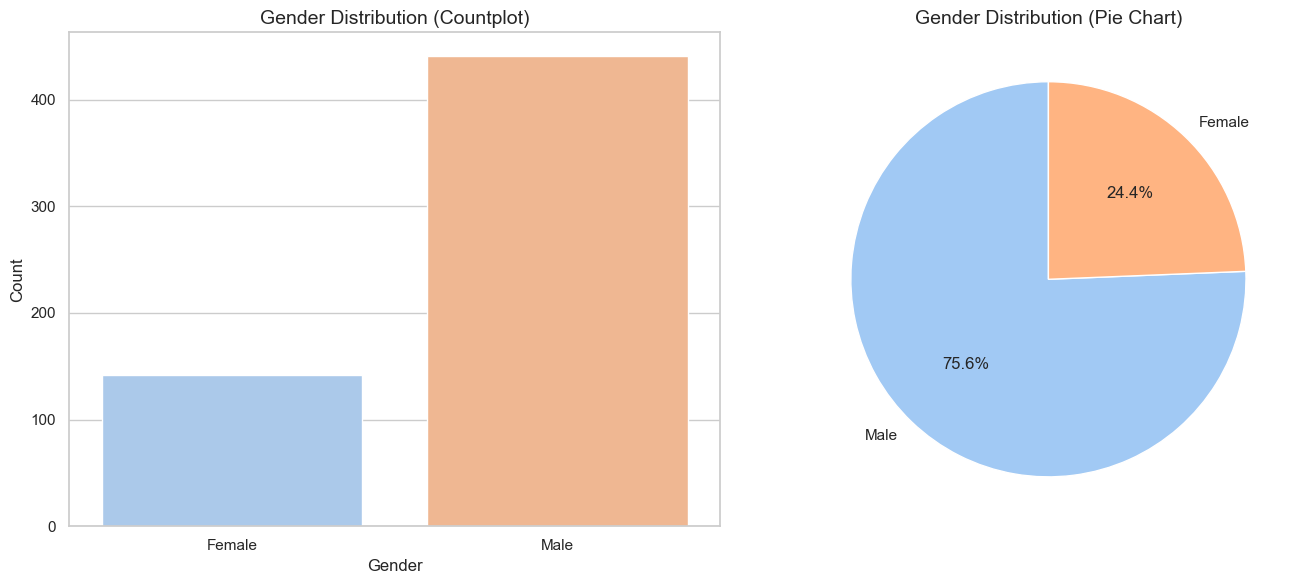

In [10]:

# Set the style for the plot
sns.set(style="whitegrid")

# Create the figure with subplots for both countplot and pie chart
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot countplot on the first axis
sns.countplot(x="gender", data=data, palette='pastel', ax=axes[0])
axes[0].set_title('Gender Distribution (Countplot)', fontsize=14)
axes[0].set_xlabel('Gender', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)

# Calculate gender distribution for pie chart
gender_counts = data['gender'].value_counts()

# Plot pie chart on the second axis
axes[1].pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
axes[1].set_title('Gender Distribution (Pie Chart)', fontsize=14)

# Display the plots
plt.tight_layout()
plt.show()


### Gender Distribution (Countplot and Pie Chart):
   - The **Countplot** shows that **441 males** and **142 females** are present in the dataset, with a clear **imbalance** towards males.
   - The **Pie Chart** illustrates this distribution, with **75.7% males** and **24.3% females**, highlighting the **predominance of males** in this dataset.
   - This gender imbalance could influence the results of any analysis that is gender-sensitive, as it may not fully represent the female population.


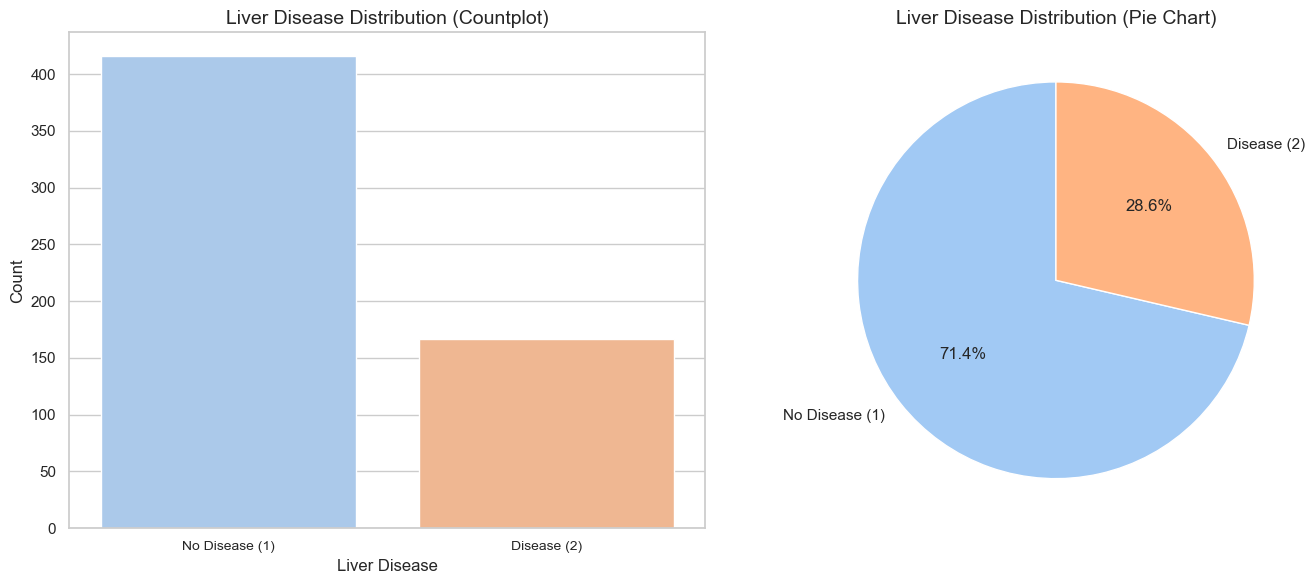

In [11]:

sns.set(style="whitegrid")

# Create the figure with subplots for both countplot and pie chart
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot countplot on the first axis
sns.countplot(x="liver_disease", data=data, palette='pastel', ax=axes[0])
axes[0].set_title('Liver Disease Distribution (Countplot)', fontsize=14)
axes[0].set_xlabel('Liver Disease', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].set_xticklabels(['No Disease (1)', 'Disease (2)'], fontsize=10)  


# Calculate liver disease distribution for pie chart
liver_disease_counts = data['liver_disease'].value_counts()

# Plot pie chart on the second axis
axes[1].pie(liver_disease_counts, labels=['No Disease (1)', 'Disease (2)'], autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
axes[1].set_title('Liver Disease Distribution (Pie Chart)', fontsize=14)

# Display the plots
plt.tight_layout()
plt.show()


### Liver Disease Distribution (Countplot and Pie Chart):
   - The **countplot** and **pie chart** both show that the majority of individuals in the dataset do not have liver disease (category 1).
   - A smaller proportion of individuals (around 20-30%) have liver disease (category 2), suggesting that liver disease is less common in this sample.


## Bivarient Analysis

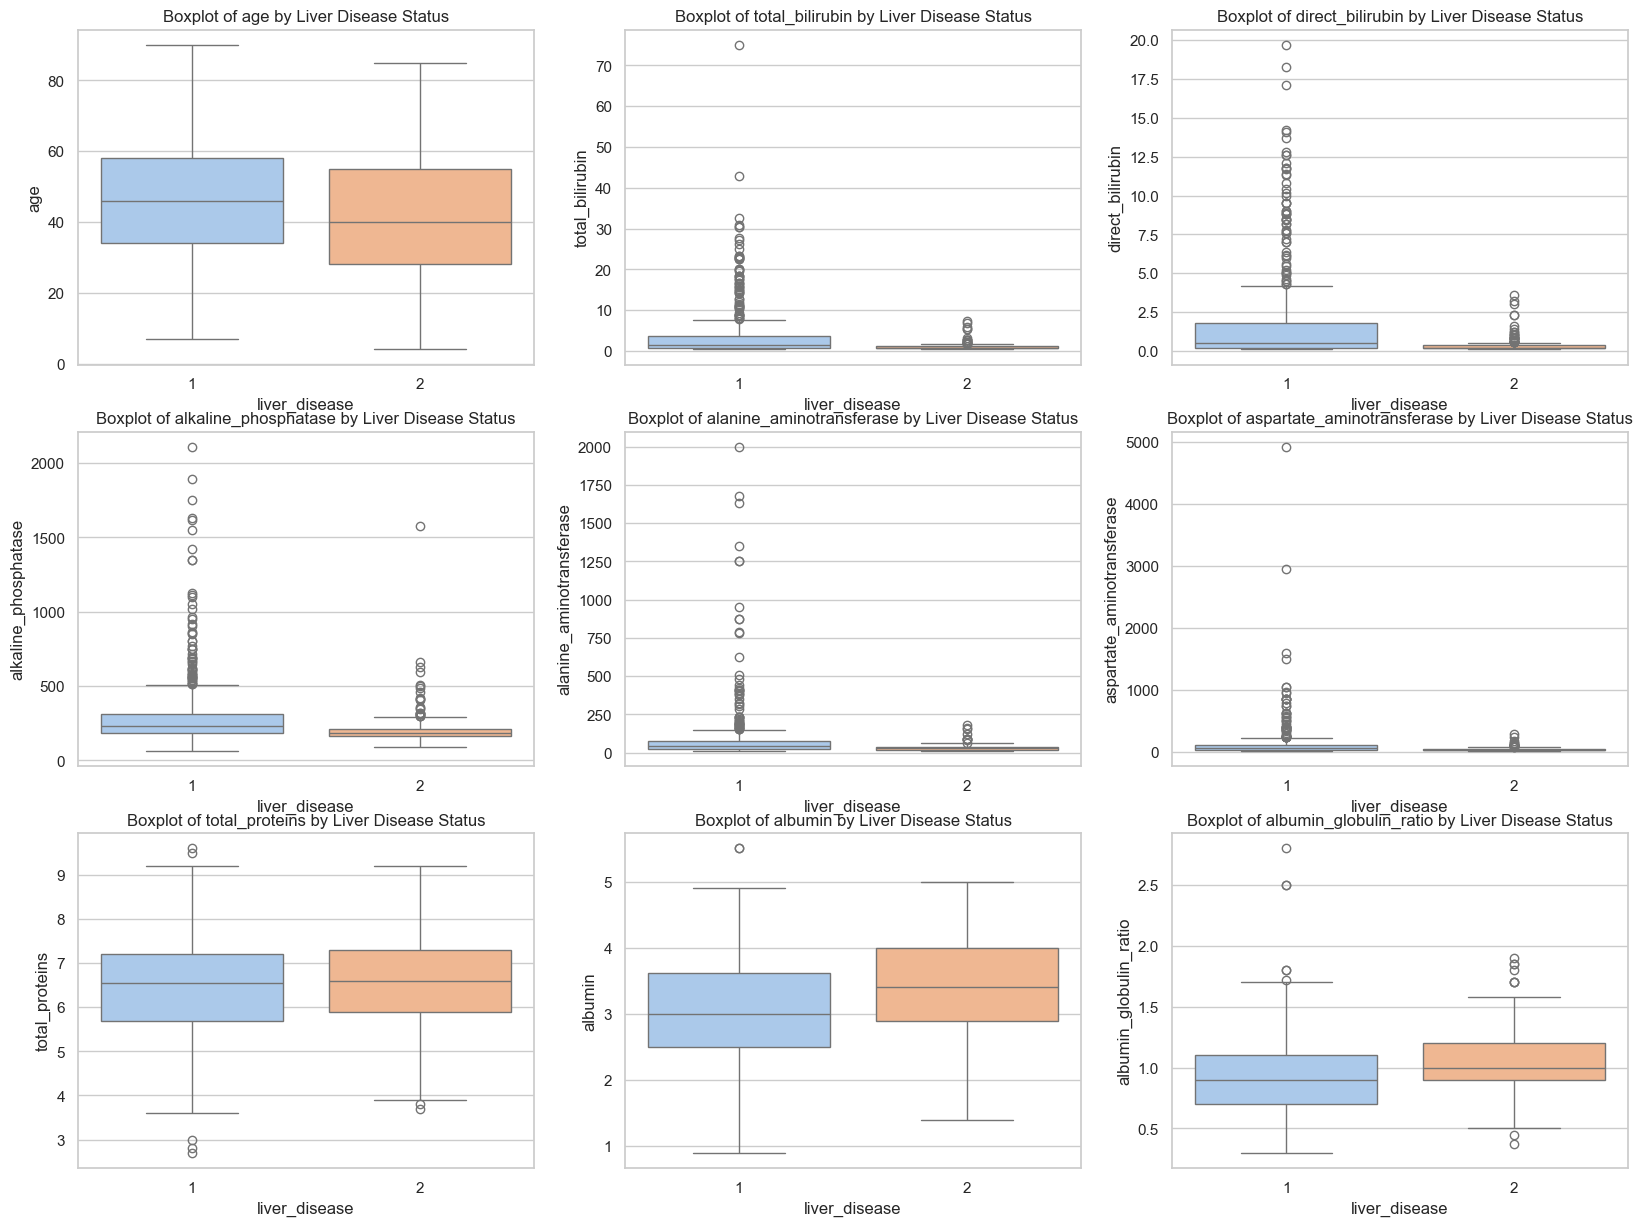

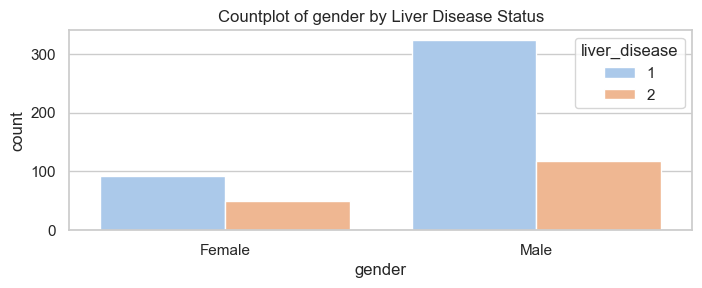

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size for better visibility
plt.figure(figsize=(20, 20))

plotnumber = 1

# For numerical variables vs liver_disease (Boxplots or Violin plots)
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

for column in numerical_columns:
    if column != 'liver_disease':  # Skip the target column
        plt.subplot(4, 3, plotnumber)
        sns.boxplot(x='liver_disease', y=column, data=data, palette='pastel')
        plt.title(f'Boxplot of {column} by Liver Disease Status', fontsize=12)
        plotnumber += 1
        if plotnumber > 9:  # Limit to first 9 plots
            break

# For categorical variables vs liver_disease (Countplots or Stacked Bar Plots)
plt.figure(figsize=(20, 10))
categorical_columns = data.select_dtypes(include=['object']).columns

for column in categorical_columns:
    if column != 'liver_disease':  # Skip the target column
        plt.subplot(4, 3, plotnumber)
        sns.countplot(x=column, hue='liver_disease', data=data, palette='pastel')
        plt.title(f'Countplot of {column} by Liver Disease Status', fontsize=12)
        plotnumber += 1
        if plotnumber > 9:  # Limit to first 9 plots
            break

# Display the plots
plt.tight_layout()
plt.show()


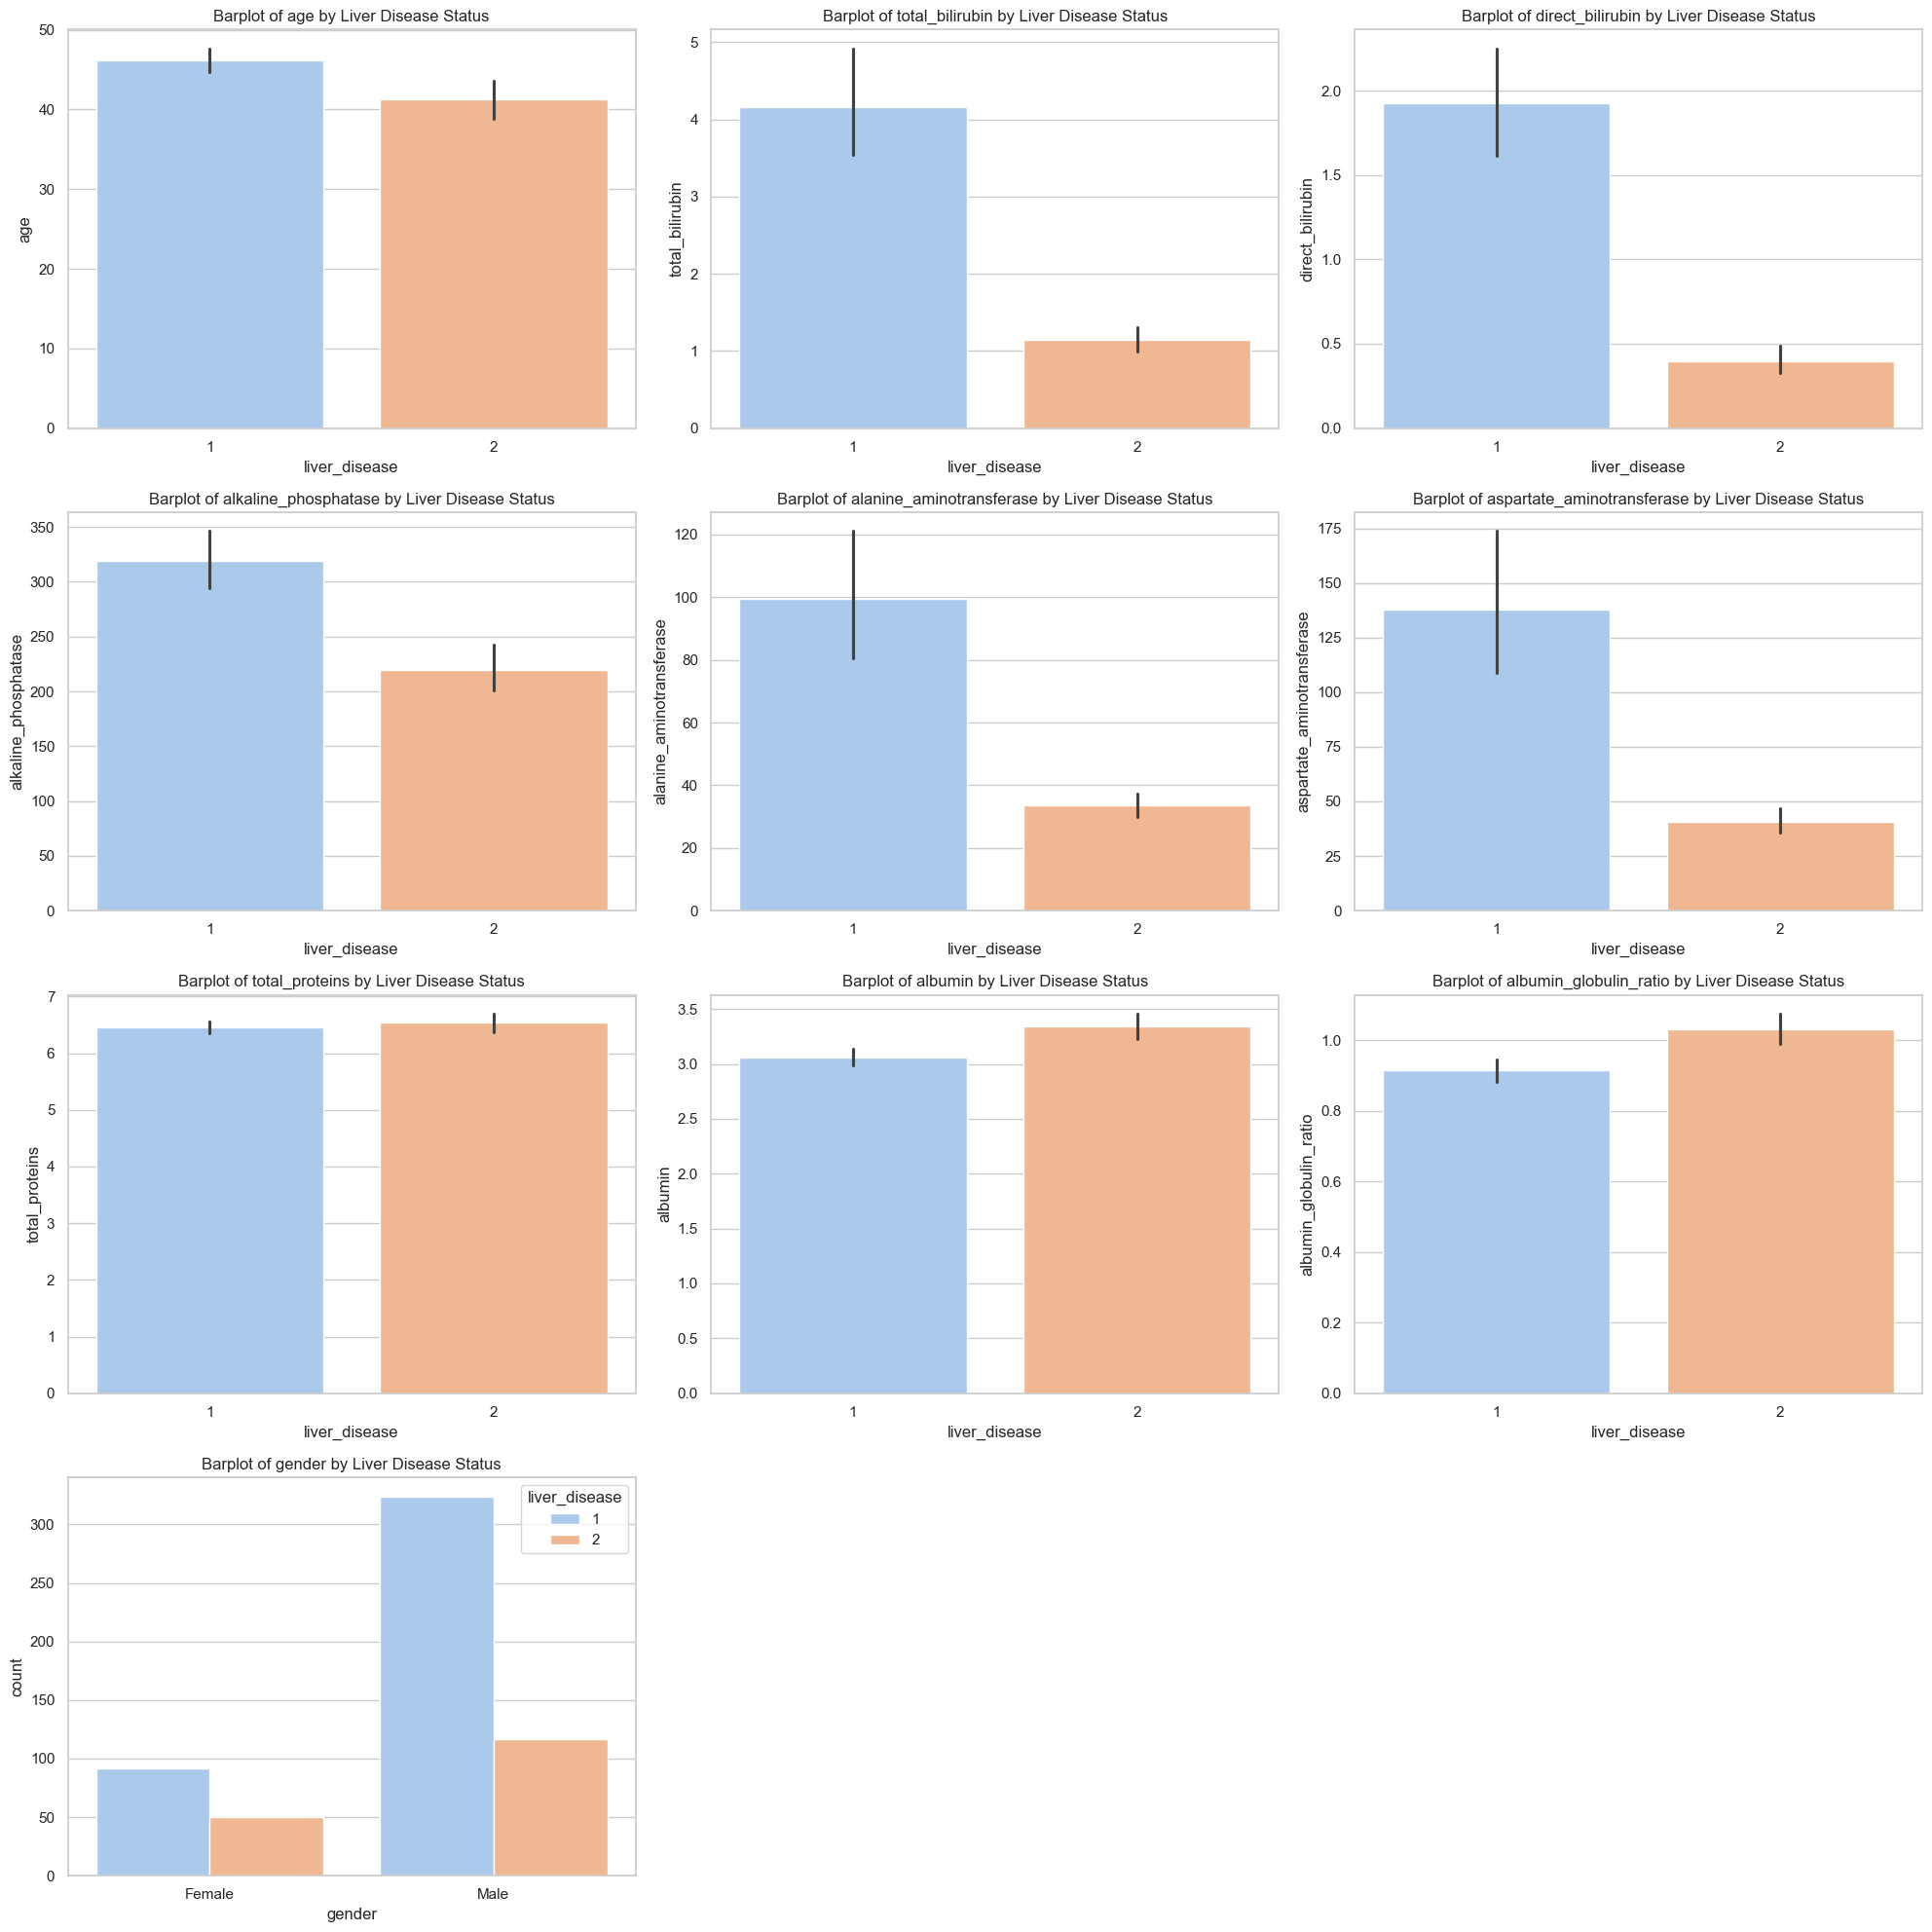

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size for better visibility
plt.figure(figsize=(20, 20))

plotnumber = 1

# For numerical variables vs liver_disease (Bar plots)
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

for column in numerical_columns:
    if column != 'liver_disease':  # Skip the target column
        plt.subplot(4, 3, plotnumber)
        sns.barplot(x='liver_disease', y=column, data=data, palette='pastel')
        plt.title(f'Barplot of {column} by Liver Disease Status', fontsize=12)
        plotnumber += 1
        if plotnumber > 9:  # Limit to first 9 plots
            break

# For categorical variables vs liver_disease (Bar plots)
categorical_columns = data.select_dtypes(include=['object']).columns

for column in categorical_columns:
    if column != 'liver_disease':  # Skip the target column
        plt.subplot(4, 3, plotnumber)
        sns.countplot(x=column, hue='liver_disease', data=data, palette='pastel')
        plt.title(f'Barplot of {column} by Liver Disease Status', fontsize=12)
        plotnumber += 1
        if plotnumber > 9:  # Limit to first 9 plots
            break

# Display the plots
plt.tight_layout()
plt.show()


### Insights 

1. **Age**:  
   Individuals with liver disease are generally older, indicating age may be a risk factor for liver disease.

2. **Total Bilirubin**:  
   Total bilirubin levels are significantly higher in individuals with liver disease, suggesting impaired liver function.

3. **Direct Bilirubin**:  
   Direct bilirubin levels are elevated in liver disease, pointing to potential bile duct issues or liver damage.

4. **Alkaline Phosphatase**:  
   Alkaline phosphatase levels are higher in liver disease, indicating possible bile duct obstruction or liver dysfunction.

5. **Alanine Aminotransferase (ALT)**:  
   ALT levels are elevated in the liver disease group, reflecting liver cell injury or inflammation.

6. **Aspartate Aminotransferase (AST)**:  
   AST levels are higher in the liver disease group, supporting liver cell damage or inflammation.

7. **Total Proteins**:  
   Total protein levels show little difference between groups, suggesting they may not be a strong indicator of liver disease.

8. **Albumin**:  
   Albumin levels are lower in the liver disease group, consistent with impaired liver function.

9. **Albumin-Globulin Ratio**:  
   The albumin-globulin ratio may differ slightly, with lower albumin and higher globulin often seen in liver disease.

10. **Gender**:  
    Gender shows a minor difference between the groups, suggesting it may not be a strong predictor of liver disease in this dataset.


# Insights Based on Analysis of Liver Disease Dataset

## 1. Age
- **Liver Disease (1)**: Patients with liver disease are generally older than those without it.
- **No Liver Disease (2)**: Patients without liver disease tend to be younger on average.

## 2. Total Bilirubin
- **Liver Disease (1)**: Liver disease patients have significantly higher total bilirubin levels compared to non-diseased patients.
- **No Liver Disease (2)**: Non-diseased patients exhibit lower total bilirubin levels, indicating normal liver function.

## 3. Direct Bilirubin
- **Liver Disease (1)**: Direct bilirubin levels are higher in patients with liver disease than in those without.
- **No Liver Disease (2)**: Non-diseased patients show lower levels of direct bilirubin.

## 4. Alkaline Phosphatase
- **Liver Disease (1)**: Higher alkaline phosphatase levels are observed in liver disease patients compared to non-diseased individuals.
- **No Liver Disease (2)**: Patients without liver disease have relatively lower alkaline phosphatase levels.

## 5. Alanine Aminotransferase (ALT)
- **Liver Disease (1)**: ALT levels are considerably elevated in patients with liver disease.
- **No Liver Disease (2)**: Non-diseased patients have much lower ALT levels.

## 6. Aspartate Aminotransferase (AST)
- **Liver Disease (1)**: Liver disease patients exhibit much higher AST levels compared to those without the disease.
- **No Liver Disease (2)**: Non-diseased individuals have lower AST levels.

## 7. Total Proteins
- **Liver Disease (1)**: Total protein levels are slightly lower in patients with liver disease.
- **No Liver Disease (2)**: Non-diseased patients tend to have slightly higher total protein levels.

## 8. Albumin
- **Liver Disease (1)**: Albumin levels are lower in patients with liver disease compared to those without it.
- **No Liver Disease (2)**: Non-diseased patients have higher albumin levels on average.

## 9. Albumin-Globulin Ratio
- **Liver Disease (1)**: Liver disease patients show a lower albumin-globulin ratio than non-diseased individuals.
- **No Liver Disease (2)**: Non-diseased patients have a higher albumin-globulin ratio.

## 10. Gender with Liver Disease
- **Gender**: There are more male patients with liver disease compared to female patients. The majority of liver disease patients are male, with 324 males vs 92 females.



# Multivarient analsysis

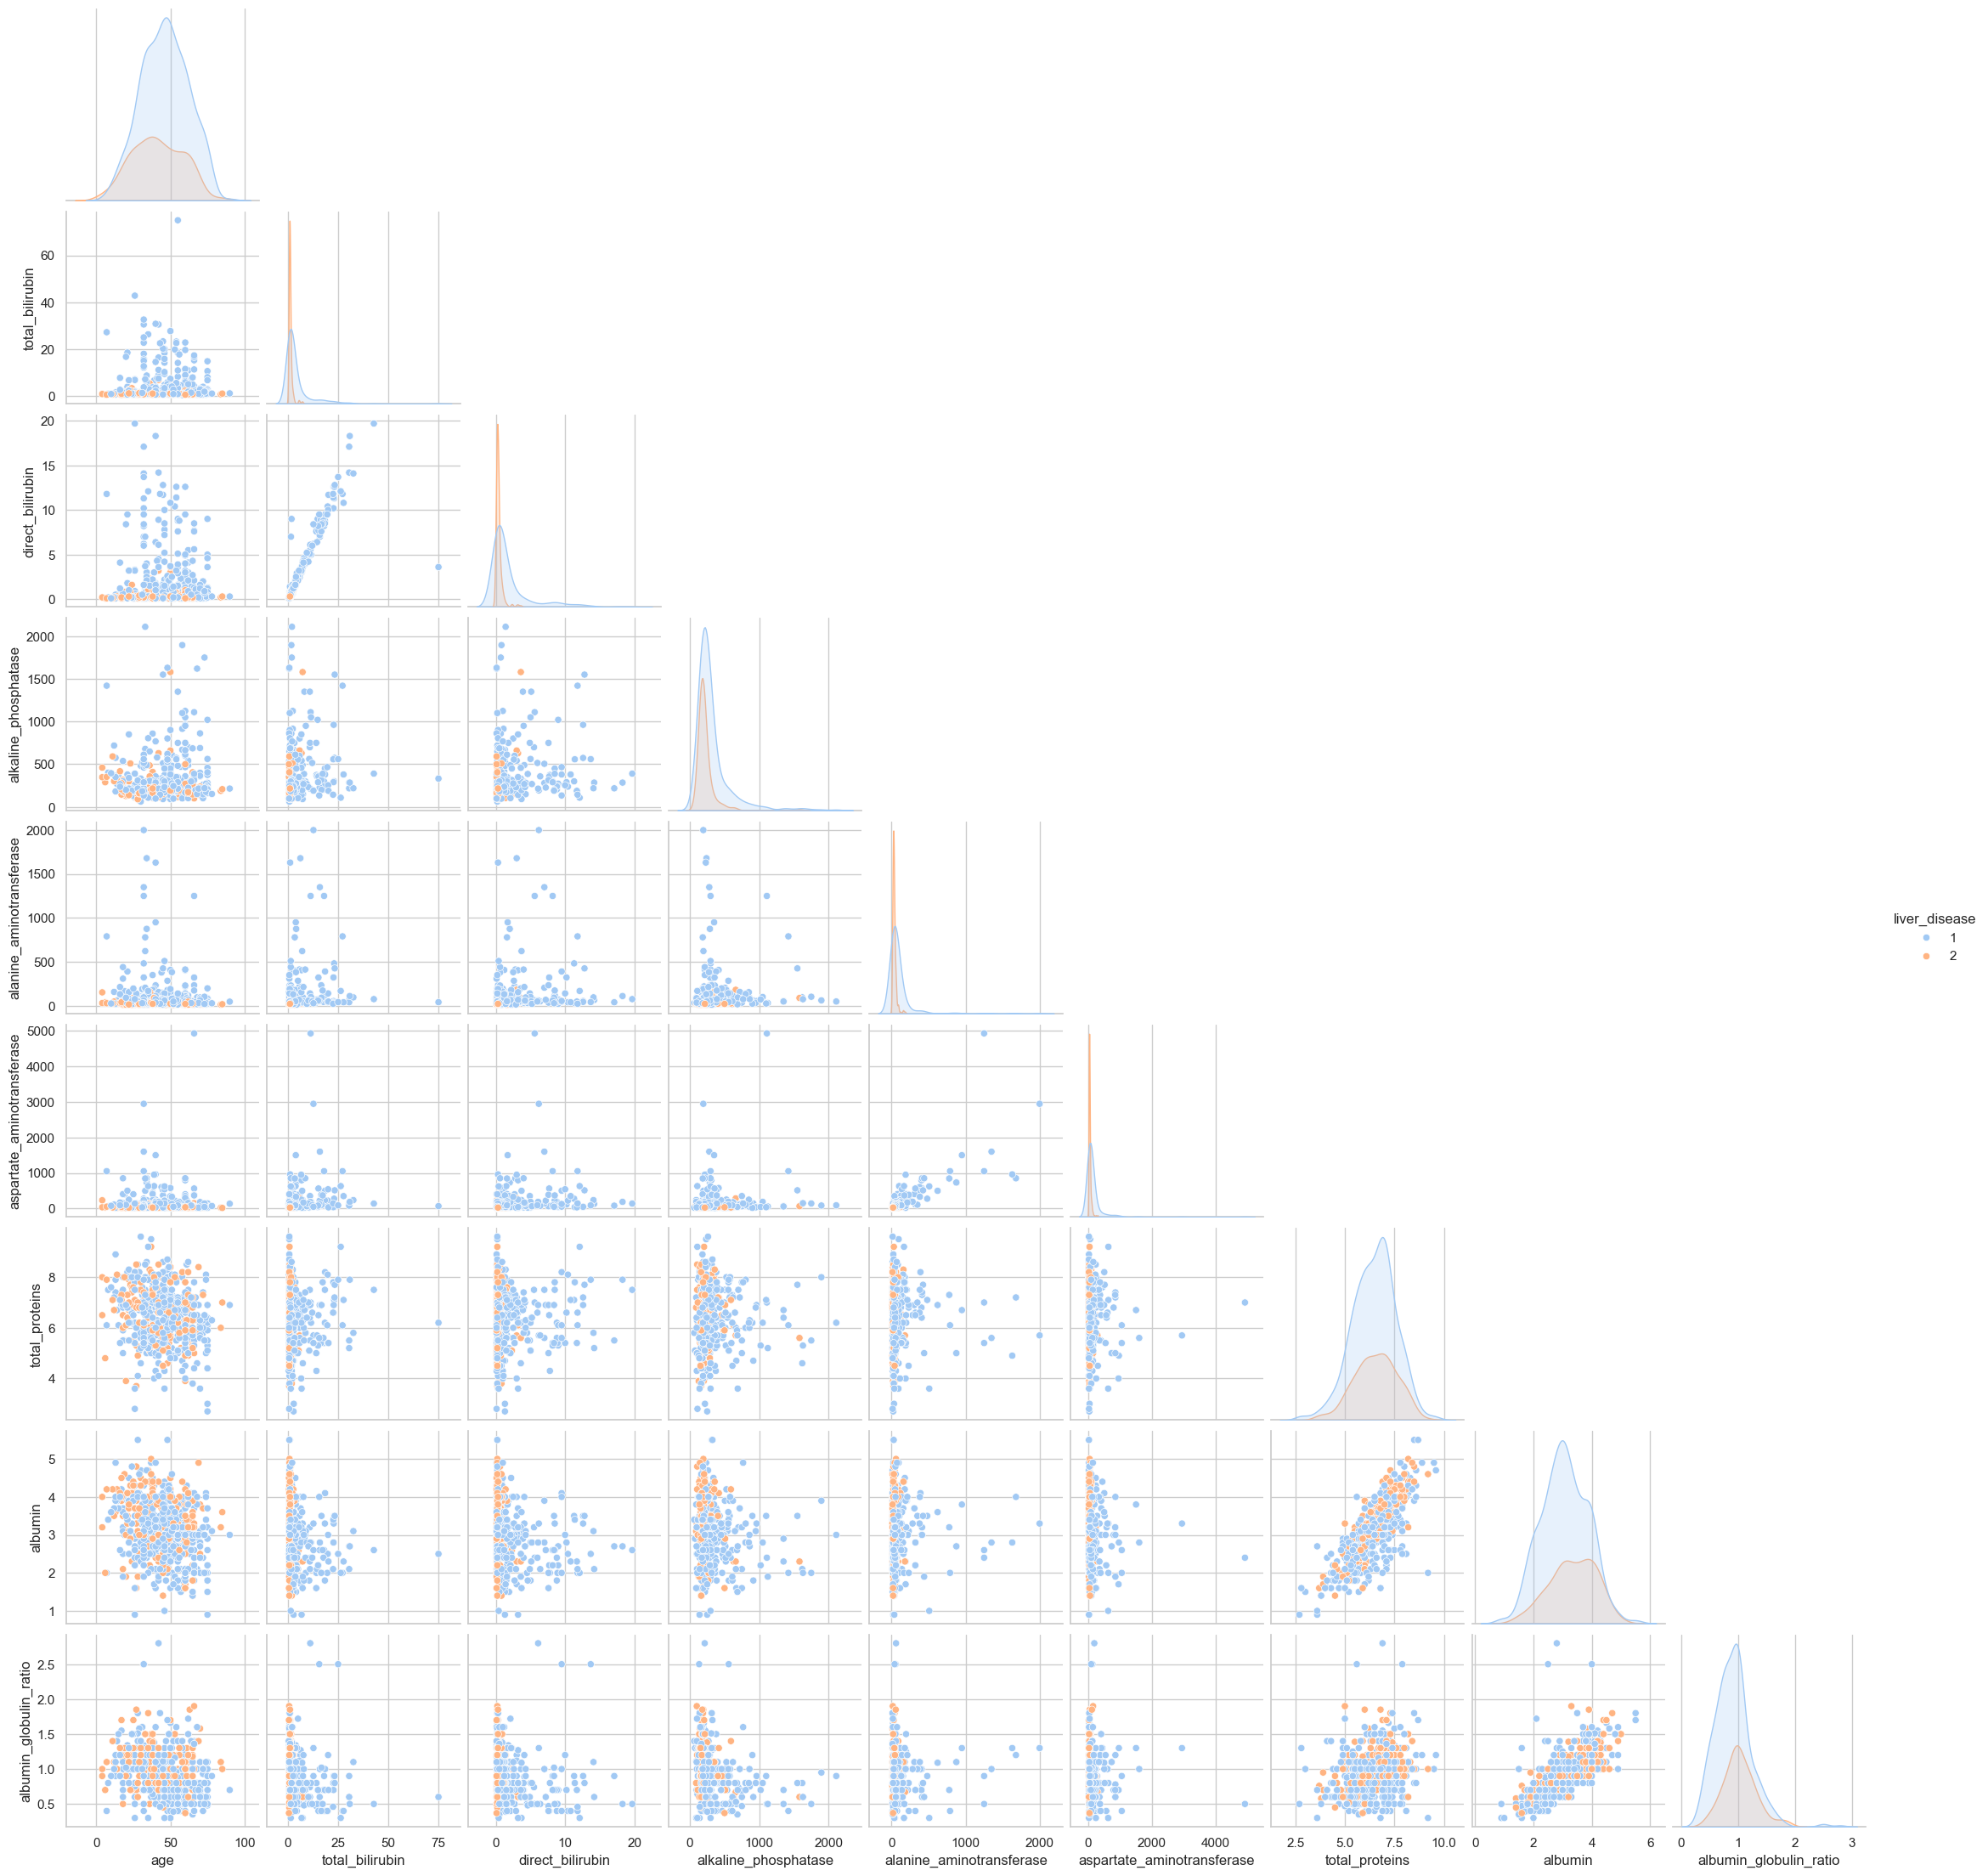

In [14]:
sns.pairplot(data=data, hue='liver_disease', palette='pastel',corner=True)

# **Data Preprocessing**

## Handling Null Values

In [15]:
data.isnull().sum()

age                           0
gender                        0
total_bilirubin               0
direct_bilirubin              0
alkaline_phosphatase          0
alanine_aminotransferase      0
aspartate_aminotransferase    0
total_proteins                0
albumin                       0
albumin_globulin_ratio        4
liver_disease                 0
dtype: int64

- The dataset contains **no null values** for most features, except for the **albumin_globulin_ratio**, which has 4 missing values.


In [16]:
data.dropna(inplace=True)

In [17]:
data.isnull().sum()

age                           0
gender                        0
total_bilirubin               0
direct_bilirubin              0
alkaline_phosphatase          0
alanine_aminotransferase      0
aspartate_aminotransferase    0
total_proteins                0
albumin                       0
albumin_globulin_ratio        0
liver_disease                 0
dtype: int64

## Handling Duplicates Entries

In [18]:
data.duplicated().sum()

13

- There are 13 duplicate rows in the data, and we have removed them.


In [19]:
# drop duplicates entries
data=data.drop_duplicates()

In [20]:
data.duplicated().sum()

0

In [21]:
df=data.copy()

# Outlier Handling

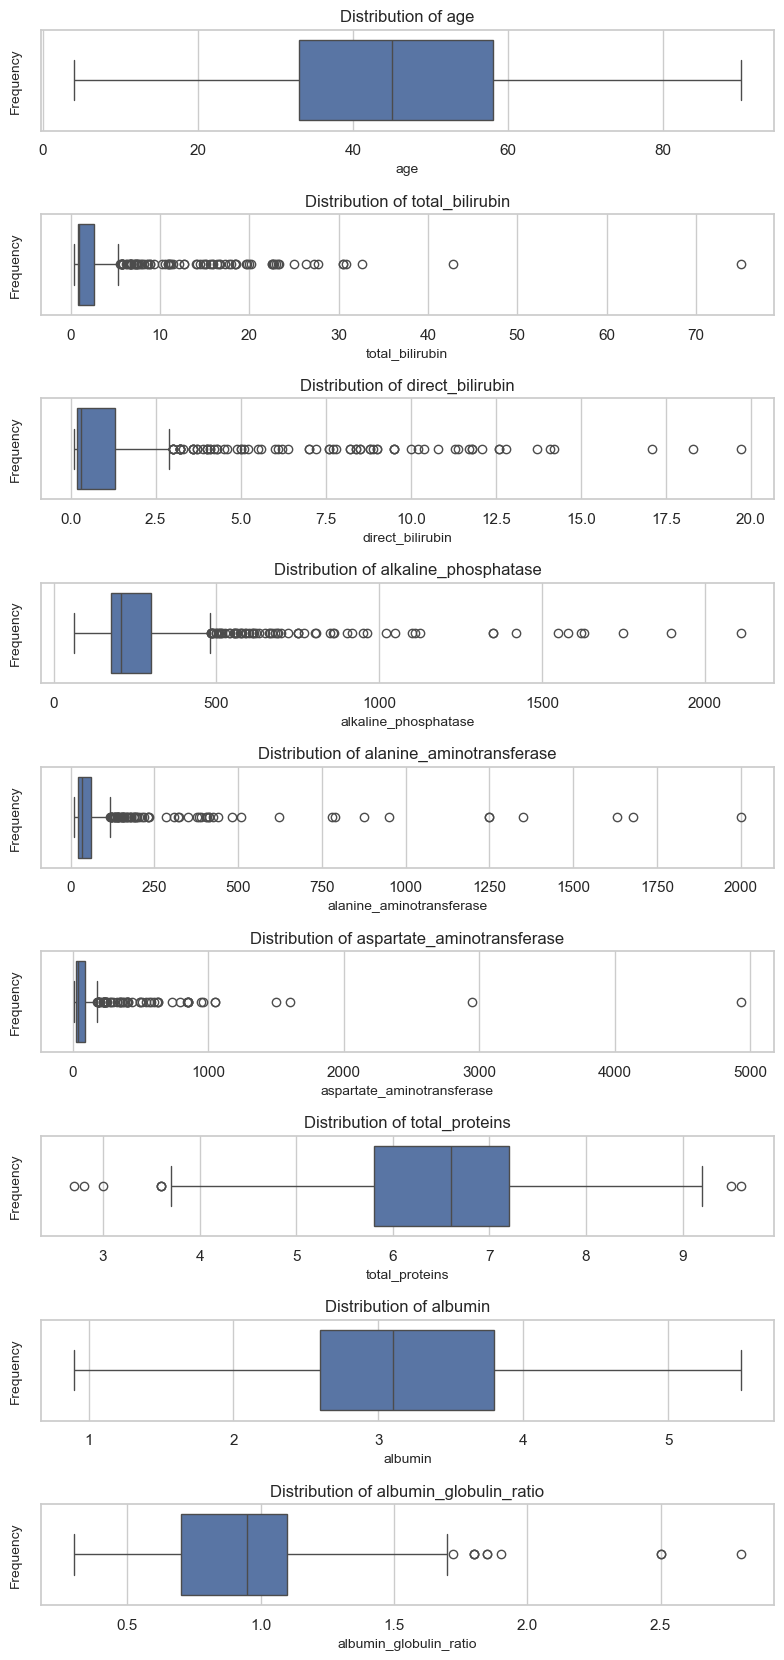

In [22]:

plt.figure(figsize=(8, 20))

plotnumber = 1

for column in df.columns:
    if column == 'liver_disease':
        continue
    if df[column].dtype in ['int64', 'float64'] and plotnumber <= 12:
        plt.subplot(11, 1, plotnumber)
        sns.boxplot(x=df[column])
        plt.title(f'Distribution of {column}', fontsize=12)
        plt.xlabel(column, fontsize=10)
        plt.ylabel('Frequency', fontsize=10)

        plotnumber += 1 

plt.tight_layout()
plt.show()


 The boxplot shows several outliers in the liver disease data. These outliers likely represent natural differences between individuals, as some people   may have higher or lower values that are still normal for them.


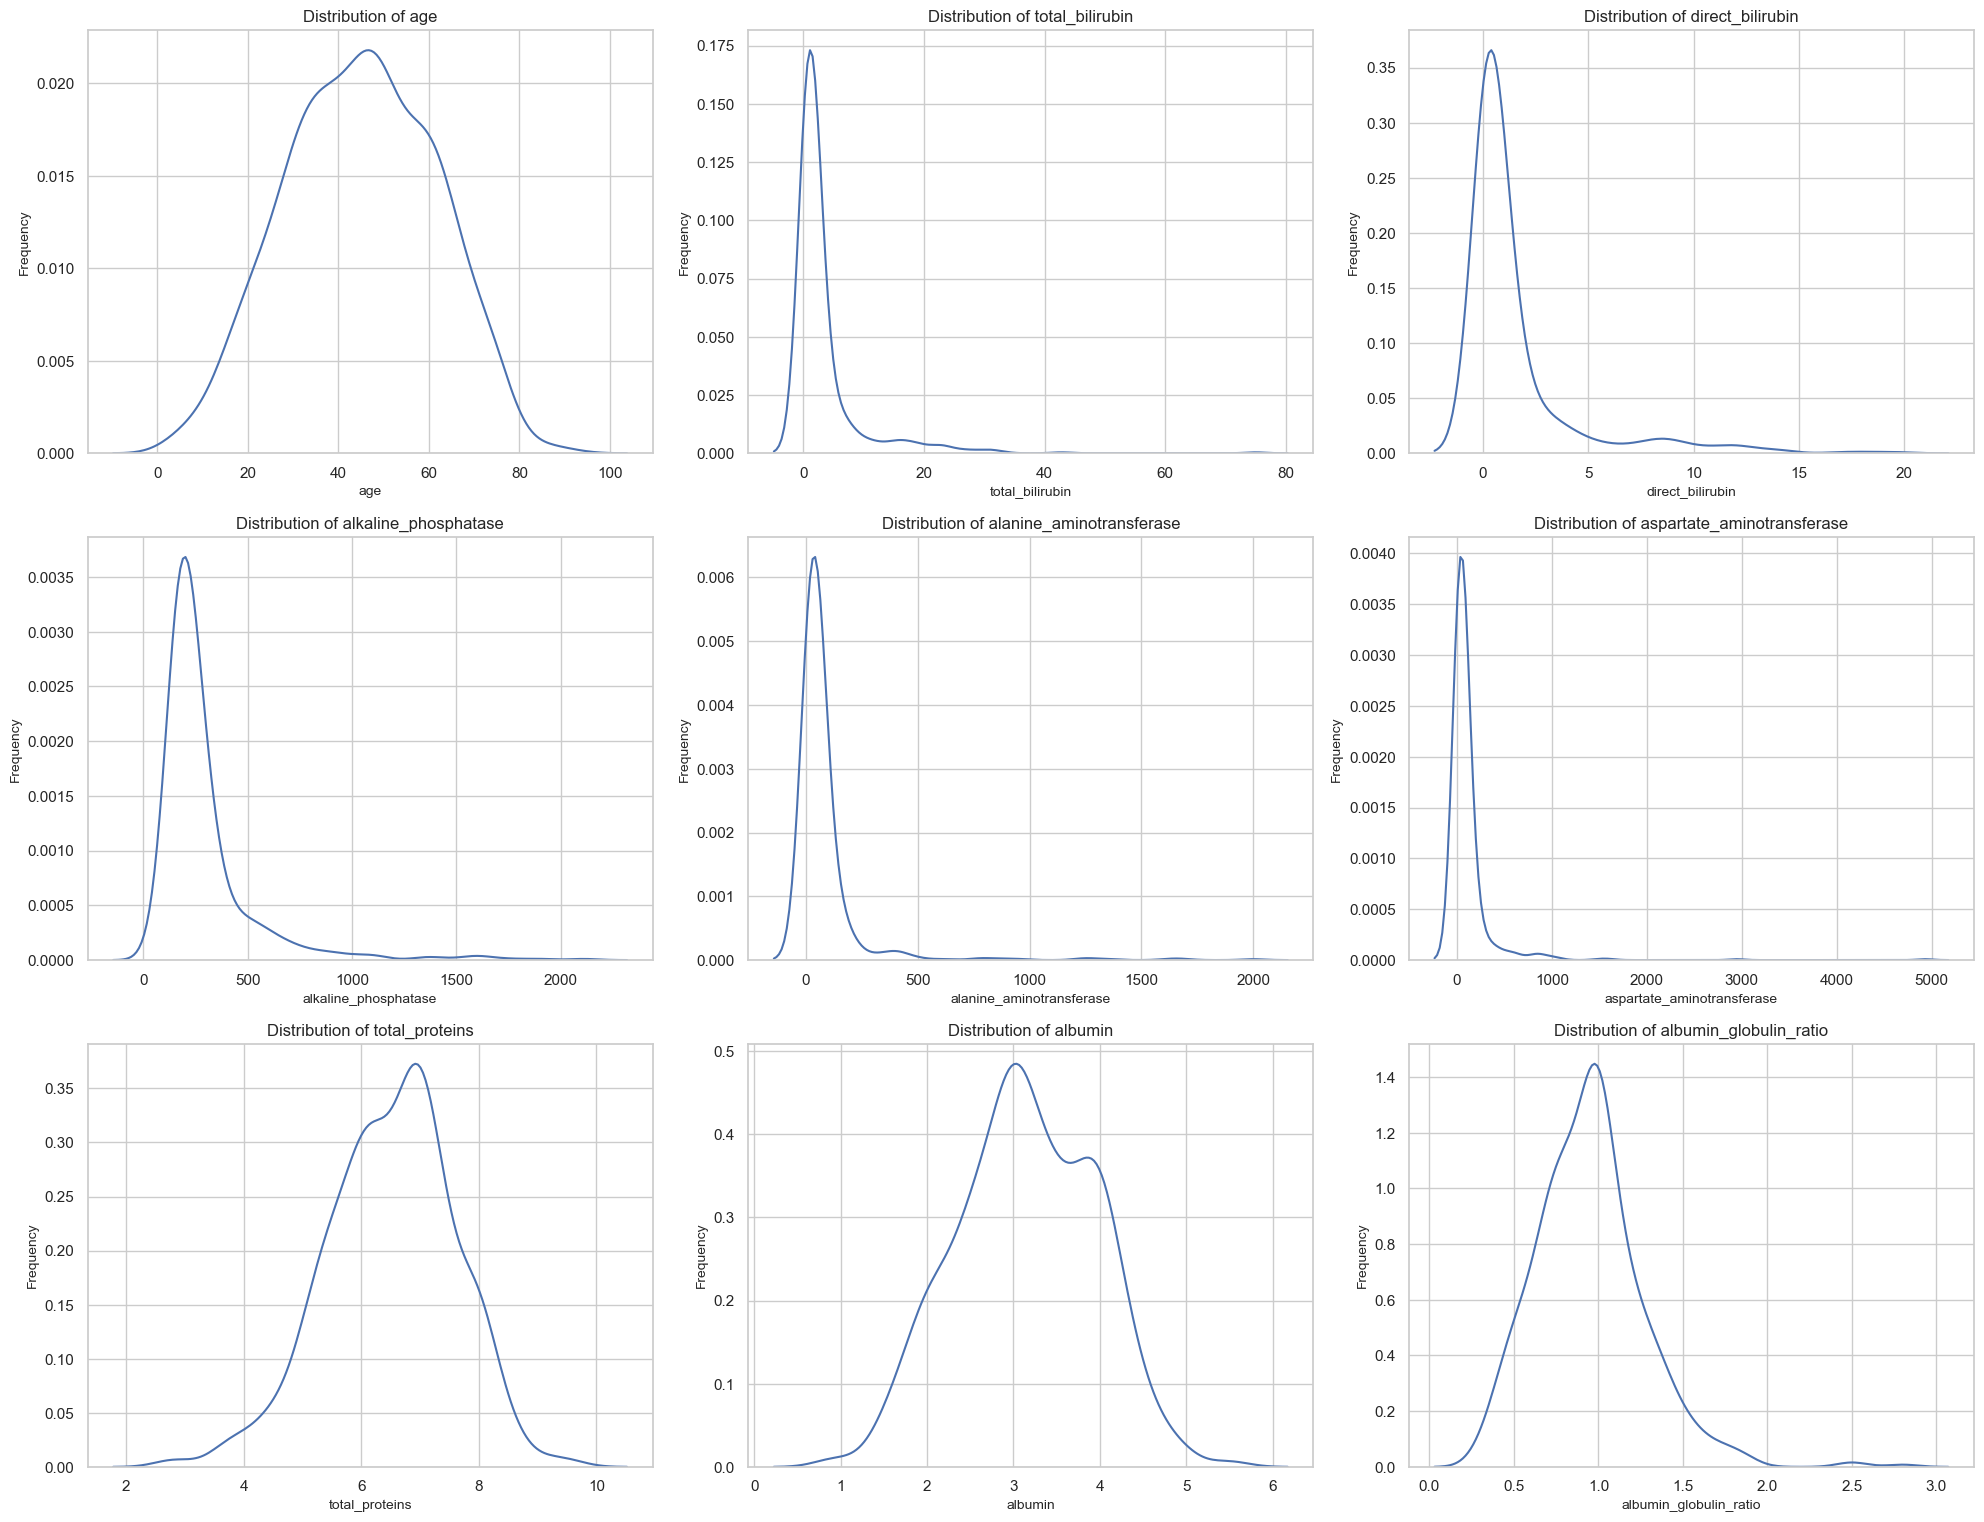

In [23]:
plt.figure(figsize=(20, 20))

plotnumber = 1

for column in df.columns:
    if column == 'liver_disease':
        continue
    if df[column].dtype in ['int64', 'float64'] and plotnumber <= 12:
        plt.subplot(4, 3, plotnumber)
        sns.kdeplot(x=df[column])
        plt.title(f'Distribution of {column}', fontsize=12)
        plt.xlabel(column, fontsize=10)
        plt.ylabel('Frequency', fontsize=10)

        plotnumber += 1 

plt.tight_layout()
plt.show()

### Data Overview:
- The dataset is slightly imbalanced, meaning one class has more data than the other.
- Some features are skewed:
  - Slightly skewed: `albumin_and_globulin_ratio`
  - Strongly skewed: `total_bilirubin`, `direct_bilirubin`, `alkaline_phosphatase`, `alanine_aminotransferase`, `aspartate_aminotransferase`

### Solution:
We will use log1p transformation to fix the skew. This makes the data more normal by applying a logarithm, which helps with values that are too high or low.
r low.


In [24]:
sc = ['total_bilirubin', 'direct_bilirubin', 
      'alkaline_phosphatase', 'alanine_aminotransferase', 
      'aspartate_aminotransferase', 'total_proteins', 'albumin', 
      'albumin_globulin_ratio']

# Apply log1p transformation on the selected columns
for c in sc:
    df[c] = df[c].apply('log1p')


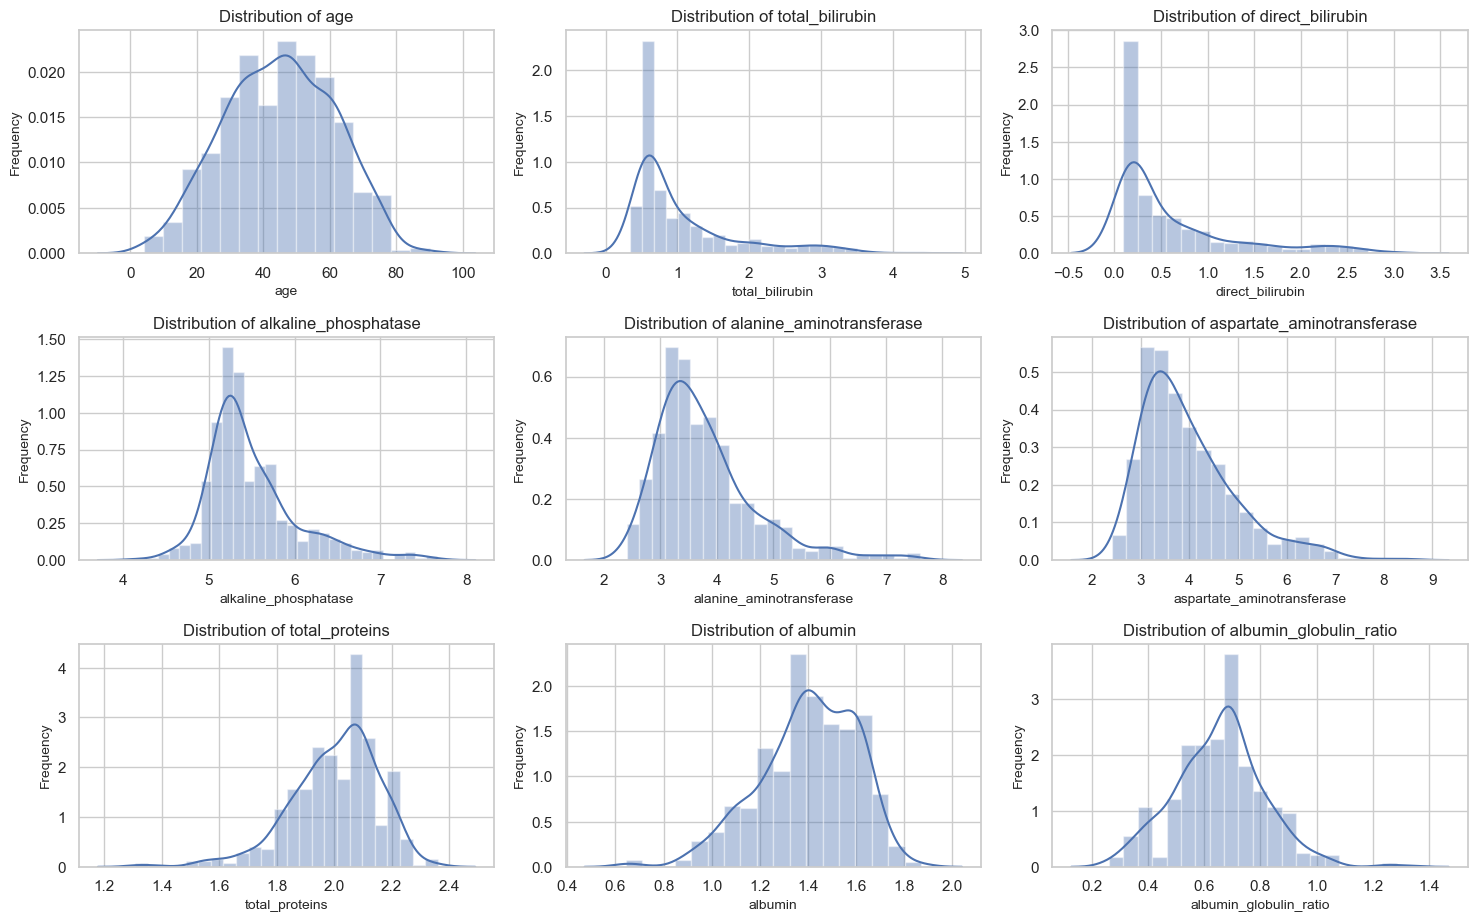

In [25]:
plt.figure(figsize=(15, 12))

plotnumber = 1

for column in df.columns:
    if column == 'liver_disease':
        continue
    if df[column].dtype in ['int64', 'float64'] and plotnumber <= 12:
        plt.subplot(4, 3, plotnumber)
        sns.distplot(x=df[column])
        plt.title(f'Distribution of {column}', fontsize=12)
        plt.xlabel(column, fontsize=10)
        plt.ylabel('Frequency', fontsize=10)

        plotnumber += 1 

plt.tight_layout()
plt.show()

# Handling Categorical data

In [26]:
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()


df['gender'] = label_encoder.fit_transform(df['gender'])

df['liver_disease'] = df['liver_disease'].map({1: 1, 2: 0})

df.head()

,age,gender,total_bilirubin,direct_bilirubin,alkaline_phosphatase,alanine_aminotransferase,aspartate_aminotransferase,total_proteins,albumin,albumin_globulin_ratio,liver_disease
0,65,0,0.530628,0.095310,5.236442,2.833213,2.944439,2.054124,1.458615,0.641854,1
1,62,1,2.476538,1.871802,6.551080,4.174387,4.615121,2.140066,1.435085,0.553885,1
2,62,1,2.116256,1.629241,6.196444,4.110874,4.234107,2.079442,1.458615,0.636577,1
3,58,1,0.693147,0.336472,5.209486,2.708050,3.044522,2.054124,1.481605,0.693147,1
4,72,1,1.589235,1.098612,5.278115,3.332205,4.094345,2.116256,1.223775,0.336472,1


# **Feature Selection**

In [27]:
correlation_matrix=df.corr()
correlation_matrix

,age,gender,total_bilirubin,direct_bilirubin,alkaline_phosphatase,alanine_aminotransferase,aspartate_aminotransferase,total_proteins,albumin,albumin_globulin_ratio,liver_disease
age,1.000000,0.057542,0.069719,0.065130,0.066078,-0.081532,-0.032432,-0.189655,-0.261709,-0.227952,0.133821
gender,0.057542,1.000000,0.156416,0.158365,0.024097,0.166338,0.181253,-0.084353,-0.084376,-0.013344,0.077396
total_bilirubin,0.069719,0.156416,1.000000,0.974831,0.346181,0.436642,0.534031,-0.039920,-0.286690,-0.313437,0.309561
direct_bilirubin,0.065130,0.158365,0.974831,1.000000,0.345820,0.427362,0.528456,-0.028331,-0.276400,-0.304989,0.313006
alkaline_phosphatase,0.066078,0.024097,0.346181,0.345820,1.000000,0.338594,0.318628,0.009854,-0.166603,-0.295481,0.231283
alanine_aminotransferase,-0.081532,0.166338,0.436642,0.427362,0.338594,1.000000,0.841155,-0.002252,-0.034575,-0.070288,0.284598
aspartate_aminotransferase,-0.032432,0.181253,0.534031,0.528456,0.318628,0.841155,1.000000,-0.049823,-0.168410,-0.171829,0.301441
total_proteins,-0.189655,-0.084353,-0.039920,-0.028331,0.009854,-0.002252,-0.049823,1.000000,0.786635,0.248758,-0.038653
albumin,-0.261709,-0.084376,-0.286690,-0.276400,-0.166603,-0.034575,-0.168410,0.786635,1.000000,0.724726,-0.160311
albumin_globulin_ratio,-0.227952,-0.013344,-0.313437,-0.304989,-0.295481,-0.070288,-0.171829,0.248758,0.724726,1.000000,-0.185577


<Axes: >

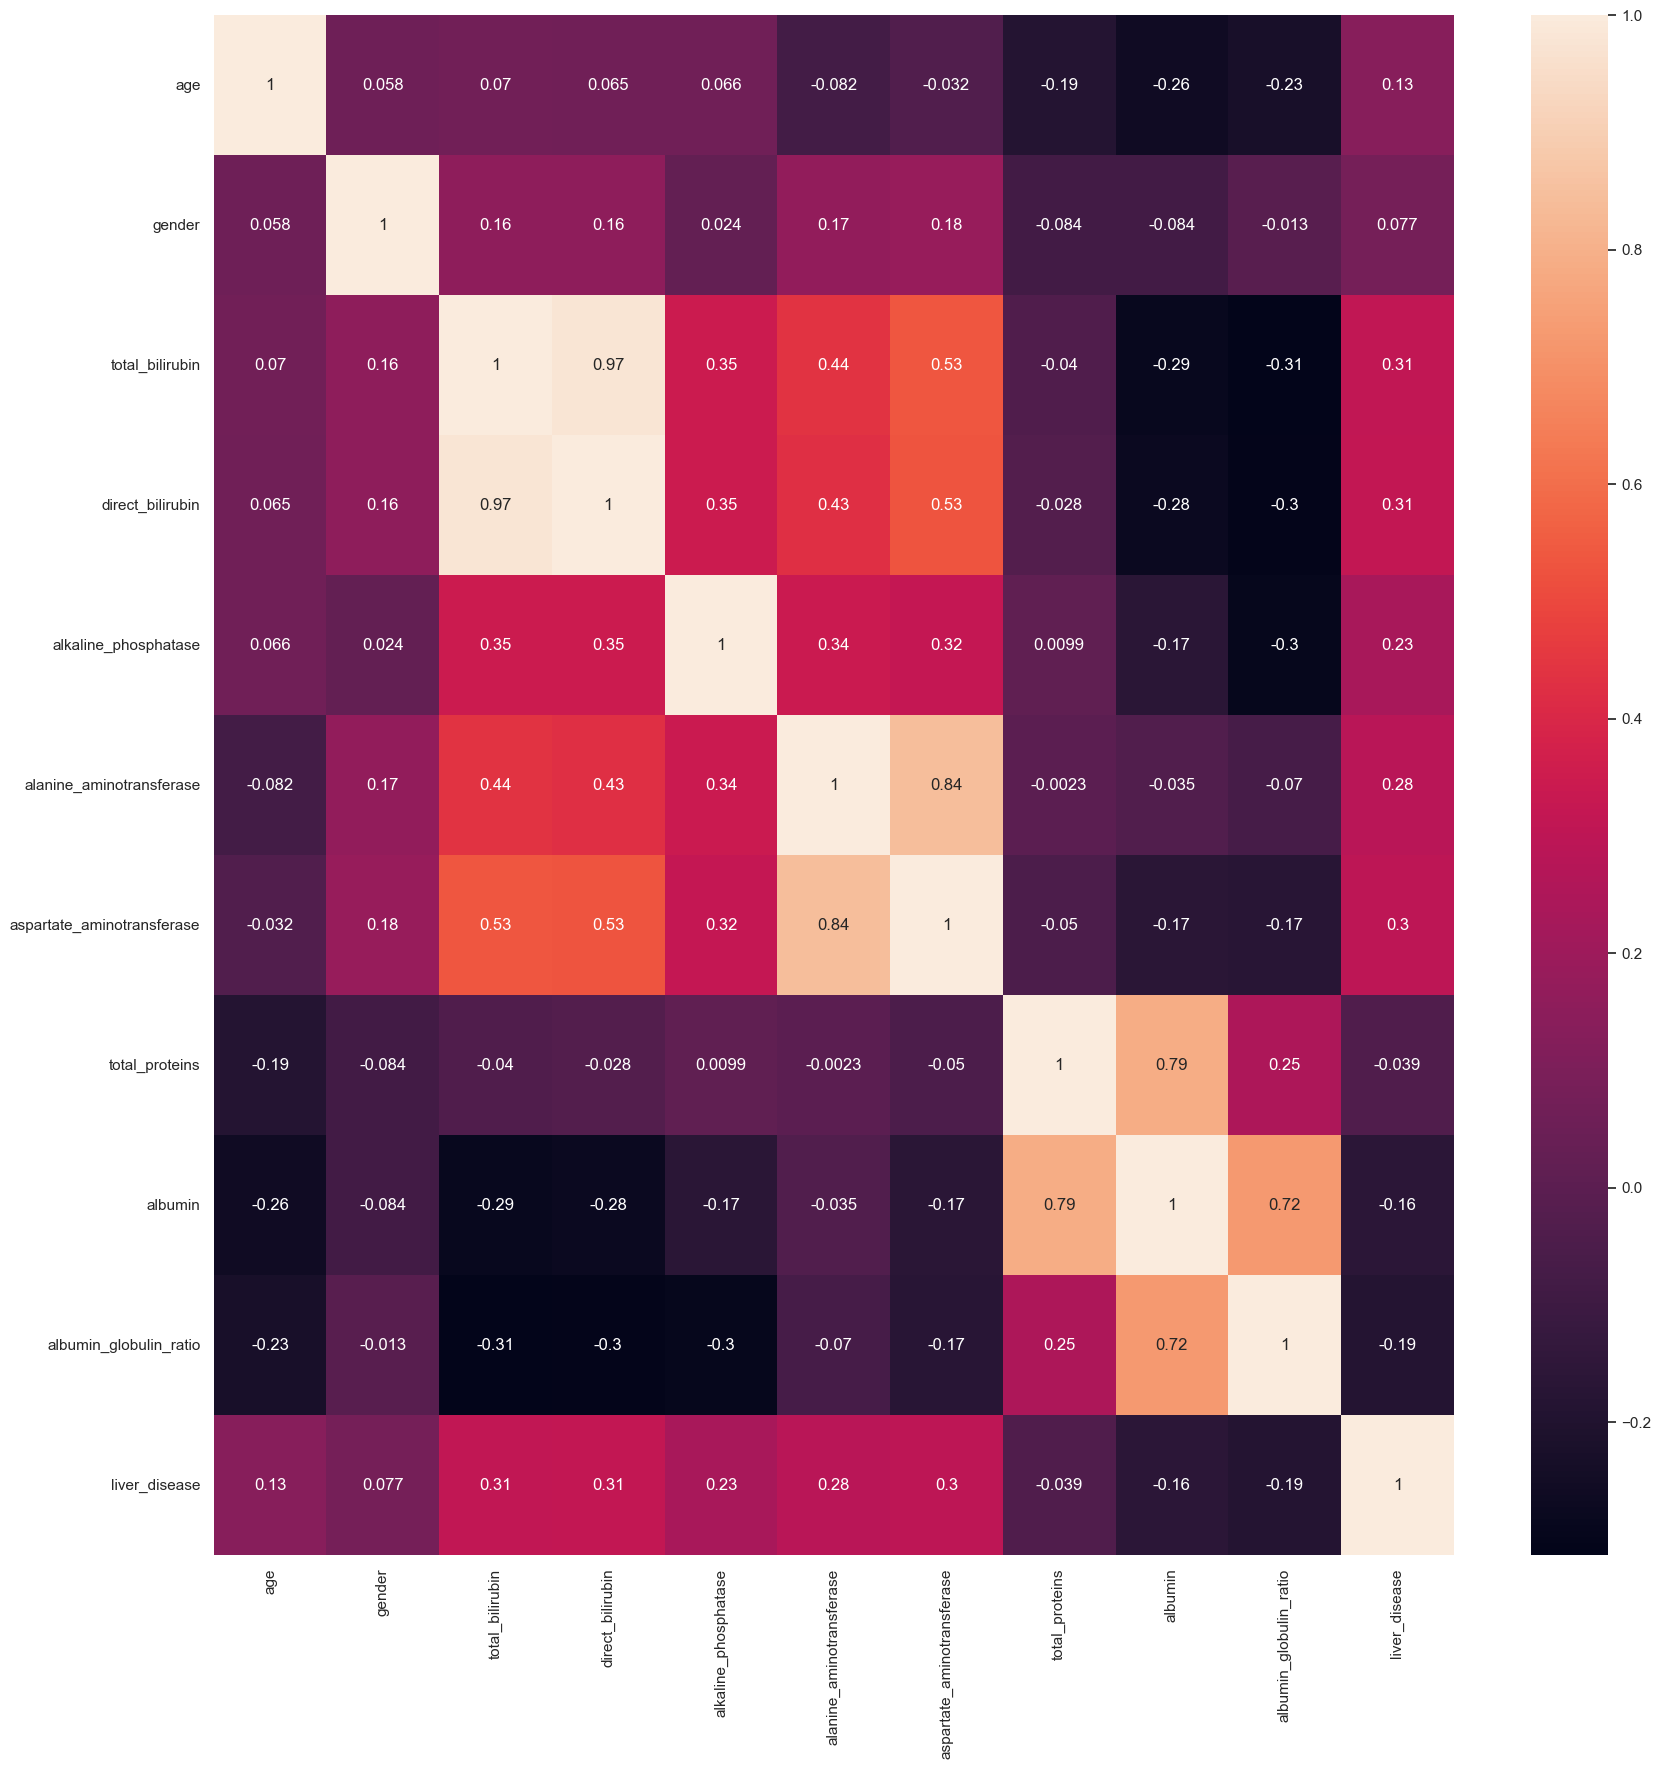

In [28]:
plt.figure(figsize = (20,20))
sns.heatmap(df.corr(),annot = True)

In [29]:
df.drop([ 'total_proteins', 'albumin','albumin_globulin_ratio'],axis=1, inplace=True)

# Scalling Data

In [30]:
from sklearn.preprocessing import RobustScaler
rs = RobustScaler()
for c in df[['age', 'total_bilirubin', 'direct_bilirubin',
       'alkaline_phosphatase', 'alanine_aminotransferase',
       'aspartate_aminotransferase']].columns:
    df[c] = rs.fit_transform(df[c].values.reshape(-1, 1))
df.head()

,age,gender,total_bilirubin,direct_bilirubin,alkaline_phosphatase,alanine_aminotransferase,aspartate_aminotransferase,liver_disease
0,0.80,0,-0.234465,-0.256774,-0.201971,-0.793961,-0.650594,1
1,0.68,1,2.572890,2.473822,2.305475,0.625247,0.719670,1
2,0.68,1,2.053111,2.100987,1.629067,0.558038,0.407169,1
3,0.52,1,0.000000,0.113909,-0.253385,-0.926407,-0.568507,1
4,1.08,1,1.292782,1.285374,-0.122488,-0.265937,0.292539,1


# **Model Creation**

In [31]:
X = df.drop('liver_disease',axis=1)
y = df['liver_disease']

# Balancing data

In [32]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X_sm,y_sm=sm.fit_resample(X,y)

# Spliting data

In [33]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X_sm, y_sm, test_size=0.20, random_state=42)

# Defining a Function for Model Building and its Evaluation

In [34]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

def evaluation(model, X_train, X_test, y_train, y_test):
    
    # Fit model on the training data
    model.fit(X_train, y_train)
    
    # Test set evaluation
    y_test_pred = model.predict(X_test)
    
    print("Test Performance")
    print("-------------------------------------------------------")
    print(classification_report(y_test, y_test_pred))
    
    print("\nConfusion Matrix")
    print(confusion_matrix(y_test, y_test_pred))


# Cross-Validation Model Evaluation with Scoring Metrics

In [35]:
from sklearn.model_selection import cross_val_score
import numpy as np

def evaluate_model_with_cv(model, X, y, cv=5, scoring='roc_auc'):
    print(f"Performing {cv}-fold cross-validation with scoring metric '{scoring}'...")
    cv_scores = cross_val_score(model, X, y, cv=cv, scoring=scoring, n_jobs=-1)
    mean_score = np.mean(cv_scores)
    std_score = np.std(cv_scores)
    print(f"Cross-Validation Results:")
    print(f"Mean {scoring}: {mean_score:.4f}")
    print(f"Standard Deviation: {std_score:.4f}")
    return mean_score, std_score


# **Models**

# Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

evaluation(lr, X_train, X_test, y_train, y_test)

Test Performance
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.73      0.84      0.78        86
           1       0.78      0.66      0.71        76

    accuracy                           0.75       162
   macro avg       0.76      0.75      0.75       162
weighted avg       0.76      0.75      0.75       162


Confusion Matrix
[[72 14]
 [26 50]]


# Hyperparameter Tunning of Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix


lr = LogisticRegression(max_iter=200)


param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'], 
    'C': [0.01, 0.1, 1, 10, 100],  
    'solver': ['lbfgs', 'liblinear', 'saga'],  
    'max_iter': [100, 200, 300]  
}


grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5, scoring='roc_auc', verbose=1, n_jobs=-1)


grid_search.fit(X_train, y_train)


best_params = grid_search.best_params_
best_lr = grid_search.best_estimator_

print("Best parameters for logistic regression :", best_params)


evaluation(best_lr, X_train, X_test, y_train, y_test)


Fitting 5 folds for each of 180 candidates, totalling 900 fits
Best parameters for logistic regression : {'C': 0.01, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
Test Performance
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.71      0.86      0.78        86
           1       0.79      0.61      0.69        76

    accuracy                           0.74       162
   macro avg       0.75      0.73      0.73       162
weighted avg       0.75      0.74      0.74       162


Confusion Matrix
[[74 12]
 [30 46]]


In [38]:
evaluate_model_with_cv(best_lr, X, y, cv=7, scoring='roc_auc')

Performing 7-fold cross-validation with scoring metric 'roc_auc'...
Cross-Validation Results:
Mean roc_auc: 0.7600
Standard Deviation: 0.0523


(0.7600064316212821, 0.052339105794739514)

# Support Vector Classifier (SVC)

In [39]:
from sklearn.svm import SVC
svc=SVC()
evaluation(svc, X_train, X_test, y_train, y_test)

Test Performance
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.71      0.86      0.78        86
           1       0.79      0.61      0.69        76

    accuracy                           0.74       162
   macro avg       0.75      0.73      0.73       162
weighted avg       0.75      0.74      0.74       162


Confusion Matrix
[[74 12]
 [30 46]]


# Hyperparameter Tunning of Support Vector Classifier (SVC)

In [40]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svc = SVC()

param_grid = {
        'C': [0.01, 0.1, 1, 10, 100, 1000],
        'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
        'gamma': ['scale', 'auto', 0.001, 0.01]
    }

grid_search = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

best_svc = grid_search.best_estimator_
print("Best Hyperparameters:", grid_search.best_params_)

evaluation(best_svc, X_train, X_test, y_train, y_test)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
Best Hyperparameters: {'C': 1000, 'gamma': 'scale', 'kernel': 'rbf'}
Test Performance
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.90      0.86        86
           1       0.87      0.79      0.83        76

    accuracy                           0.85       162
   macro avg       0.85      0.84      0.84       162
weighted avg       0.85      0.85      0.84       162


Confusion Matrix
[[77  9]
 [16 60]]


In [41]:
evaluate_model_with_cv(best_svc, X, y, cv=7, scoring='roc_auc')

Performing 7-fold cross-validation with scoring metric 'roc_auc'...
Cross-Validation Results:
Mean roc_auc: 0.7077
Standard Deviation: 0.0763


(0.7077047315941029, 0.0763476707059474)

# K-Nearest Neighbors (KNN)

In [42]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
evaluation(knn, X_train, X_test, y_train, y_test)


Test Performance
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.79      0.92      0.85        86
           1       0.89      0.72      0.80        76

    accuracy                           0.83       162
   macro avg       0.84      0.82      0.82       162
weighted avg       0.84      0.83      0.82       162


Confusion Matrix
[[79  7]
 [21 55]]


# Hyperparameter Tunning of K-Nearest Neighbors (KNN)

In [43]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

param_grid = {
        'n_neighbors': [3,5,7,9,11],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    }

grid_search = GridSearchCV(knn, param_grid=param_grid, cv=7, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Hyperparameters: {best_params}")
best_knn = grid_search.best_estimator_
evaluation(best_knn, X_train, X_test, y_train, y_test)

Fitting 7 folds for each of 20 candidates, totalling 140 fits
Best Hyperparameters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Test Performance
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.97      0.89        86
           1       0.95      0.78      0.86        76

    accuracy                           0.88       162
   macro avg       0.89      0.87      0.87       162
weighted avg       0.89      0.88      0.87       162


Confusion Matrix
[[83  3]
 [17 59]]


In [44]:
evaluate_model_with_cv(best_knn, X_train, y_train, cv=10, scoring='roc_auc')

Performing 10-fold cross-validation with scoring metric 'roc_auc'...
Cross-Validation Results:
Mean roc_auc: 0.8511
Standard Deviation: 0.0684


(0.8511156486742424, 0.06836247128433645)

# Random Forest

In [45]:
from sklearn.ensemble import RandomForestClassifier
# Random Forest
rf = RandomForestClassifier(n_estimators=50)
evaluation(rf, X_train, X_test, y_train, y_test)


Test Performance
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.84      0.85      0.84        86
           1       0.83      0.82      0.82        76

    accuracy                           0.83       162
   macro avg       0.83      0.83      0.83       162
weighted avg       0.83      0.83      0.83       162


Confusion Matrix
[[73 13]
 [14 62]]


# Hyperparameter tunning of Random Forest

In [46]:
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(random_state=42)

# Define the parameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20,30,50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}



# Perform GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=5, scoring='roc_auc', n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

# Best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(f"Best Hyperparameters: {best_params}")
# Evaluate the best model on the test data
best_rf = grid_search.best_estimator_

evaluation(best_rf, X_train, X_test, y_train, y_test)

Fitting 5 folds for each of 405 candidates, totalling 2025 fits
Best Hyperparameters: {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Test Performance
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        86
           1       0.84      0.84      0.84        76

    accuracy                           0.85       162
   macro avg       0.85      0.85      0.85       162
weighted avg       0.85      0.85      0.85       162


Confusion Matrix
[[74 12]
 [12 64]]


In [47]:
evaluate_model_with_cv(best_rf, X_train, y_train, cv=7, scoring='roc_auc')

Performing 7-fold cross-validation with scoring metric 'roc_auc'...
Cross-Validation Results:
Mean roc_auc: 0.8907
Standard Deviation: 0.0405


(0.8907269136455076, 0.04054660430340279)

# Gradient Boosting Classifier

In [48]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
evaluation(gbc, X_train, X_test, y_train, y_test)

Test Performance
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.81      0.74      0.78        86
           1       0.73      0.80      0.77        76

    accuracy                           0.77       162
   macro avg       0.77      0.77      0.77       162
weighted avg       0.77      0.77      0.77       162


Confusion Matrix
[[64 22]
 [15 61]]


# Hyperparameter Tunning of Gradient Boosting Classifier

In [49]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(random_state=42)


param_grid_gbc = {
    'n_estimators': [50, 100, 150,200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7,9], 
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


grid_search_gbc = GridSearchCV(estimator=gbc, param_grid=param_grid_gbc, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search_gbc.fit(X_train, y_train)


best_gbc = grid_search_gbc.best_estimator_
print(f"Best Parameters for GBC: {grid_search_gbc.best_params_}")


evaluation(best_gbc, X_train, X_test, y_train, y_test)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Best Parameters for GBC: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Test Performance
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.84      0.78      0.81        86
           1       0.77      0.83      0.80        76

    accuracy                           0.80       162
   macro avg       0.80      0.80      0.80       162
weighted avg       0.81      0.80      0.80       162


Confusion Matrix
[[67 19]
 [13 63]]


In [50]:
evaluate_model_with_cv(best_gbc, X, y, cv=7, scoring='roc_auc')

Performing 7-fold cross-validation with scoring metric 'roc_auc'...
Cross-Validation Results:
Mean roc_auc: 0.7322
Standard Deviation: 0.0643


(0.7321613316148943, 0.06432238119890438)

# XGBoost

In [51]:
import xgboost as xgb
gb_model = xgb.XGBClassifier()
evaluation(gb_model, X_train, X_test, y_train, y_test)

Test Performance
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.84      0.80      0.82        86
           1       0.79      0.83      0.81        76

    accuracy                           0.81       162
   macro avg       0.81      0.82      0.81       162
weighted avg       0.82      0.81      0.81       162


Confusion Matrix
[[69 17]
 [13 63]]


# Hyperparameter tuning for XGBoost 

In [52]:
param_grid = {
    'n_estimators': [50, 100], 
    'learning_rate': [0.01, 0.05], 
    'max_depth': [3, 4, 5],  
    'subsample': [0.7, 0.8],  
    'colsample_bytree': [0.7, 0.8],  
    'reg_alpha': [0, 0.1, 0.5],  
    'reg_lambda': [0, 0.1, 0.5],  
    'gamma': [0, 0.1, 0.5],  
    'min_child_weight': [1, 5]  
}



grid_search_xgboost = GridSearchCV(estimator=xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
                           param_grid=param_grid,
                           cv=5,  
                           n_jobs=-1,  
                           scoring='accuracy',
                           verbose=1)

# Fit the model
grid_search_xgboost.fit(X_train, y_train)

# Get the best model
best_xgboost = grid_search_xgboost.best_estimator_
print(f"Best Parameter for xboost: {grid_search_xgboost.best_params_}")
evaluation(best_xgboost, X_train, X_test, y_train, y_test)




Fitting 5 folds for each of 2592 candidates, totalling 12960 fits
Best Parameter for xboost: {'colsample_bytree': 0.7, 'gamma': 0.1, 'learning_rate': 0.05, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 100, 'reg_alpha': 0.1, 'reg_lambda': 0.5, 'subsample': 0.7}
Test Performance
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.81      0.85      0.83        86
           1       0.82      0.78      0.80        76

    accuracy                           0.81       162
   macro avg       0.82      0.81      0.81       162
weighted avg       0.82      0.81      0.81       162


Confusion Matrix
[[73 13]
 [17 59]]


In [53]:
evaluate_model_with_cv(best_xgboost, X_train, y_train, cv=7, scoring='accuracy')

Performing 7-fold cross-validation with scoring metric 'accuracy'...
Cross-Validation Results:
Mean accuracy: 0.7832
Standard Deviation: 0.0321


(0.7832431710412074, 0.03205451219947481)

# AdaBoost Classifier

In [54]:
from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier( n_estimators=100)
evaluation(ad, X_train, X_test, y_train, y_test)

Test Performance
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.73      0.69      0.71        86
           1       0.67      0.71      0.69        76

    accuracy                           0.70       162
   macro avg       0.70      0.70      0.70       162
weighted avg       0.70      0.70      0.70       162


Confusion Matrix
[[59 27]
 [22 54]]


# Hyperparameter tuning for AdaBoost Classifier

In [55]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Instantiate AdaBoost classifier
adaboost = AdaBoostClassifier(random_state=42)

# Define the parameter grid for AdaBoost
param_grid_adaboost = {
        'n_estimators': [50, 100, 150],
        'learning_rate': [0.01, 0.1, 0.5, 1, 2],
        'base_estimator': [DecisionTreeClassifier(max_depth=d) for d in [1, 2, 3]]
    }

# Perform GridSearchCV to find the best hyperparameters
grid_search_adaboost = GridSearchCV(estimator=adaboost, param_grid=param_grid_adaboost, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search_adaboost.fit(X_train, y_train)

# Get the best model and its parameters
best_adaboost = grid_search_adaboost.best_estimator_
print(f"Best Parameters for AdaBoost: {grid_search_adaboost.best_params_}")

# Evaluate the model
evaluation(best_adaboost, X_train, X_test, y_train, y_test)


Fitting 5 folds for each of 45 candidates, totalling 225 fits
Best Parameters for AdaBoost: {'base_estimator': DecisionTreeClassifier(max_depth=3), 'learning_rate': 1, 'n_estimators': 150}
Test Performance
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.82      0.67      0.74        86
           1       0.69      0.83      0.75        76

    accuracy                           0.75       162
   macro avg       0.75      0.75      0.75       162
weighted avg       0.76      0.75      0.75       162


Confusion Matrix
[[58 28]
 [13 63]]


In [56]:
evaluate_model_with_cv(best_adaboost, X_train, y_train, cv=7, scoring='accuracy')

Performing 7-fold cross-validation with scoring metric 'accuracy'...
Cross-Validation Results:
Mean accuracy: 0.7987
Standard Deviation: 0.0479


(0.7987043344687103, 0.04788278931828361)

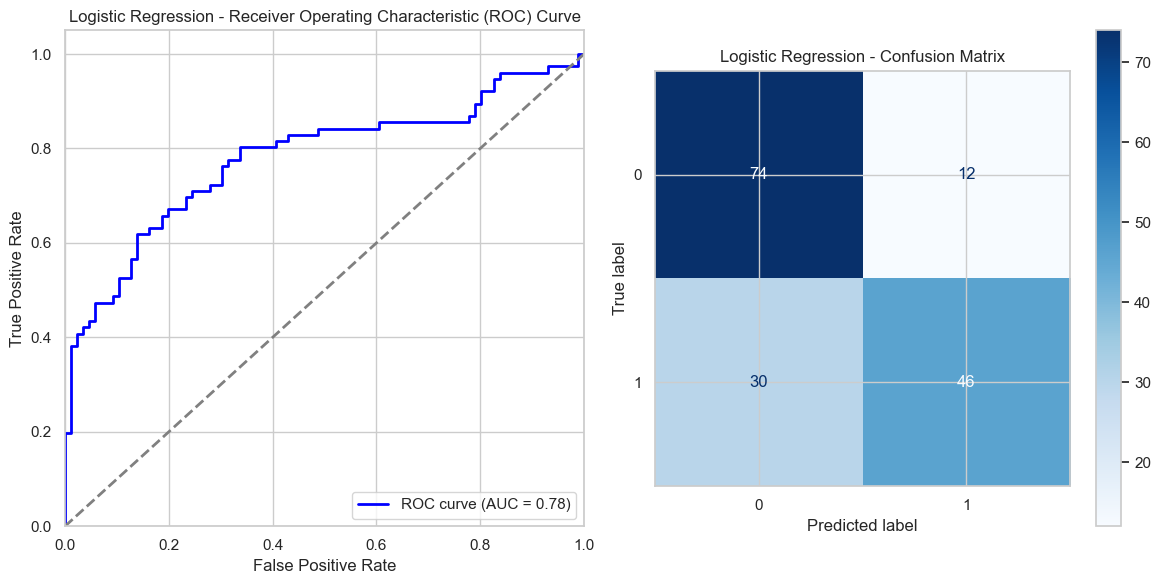

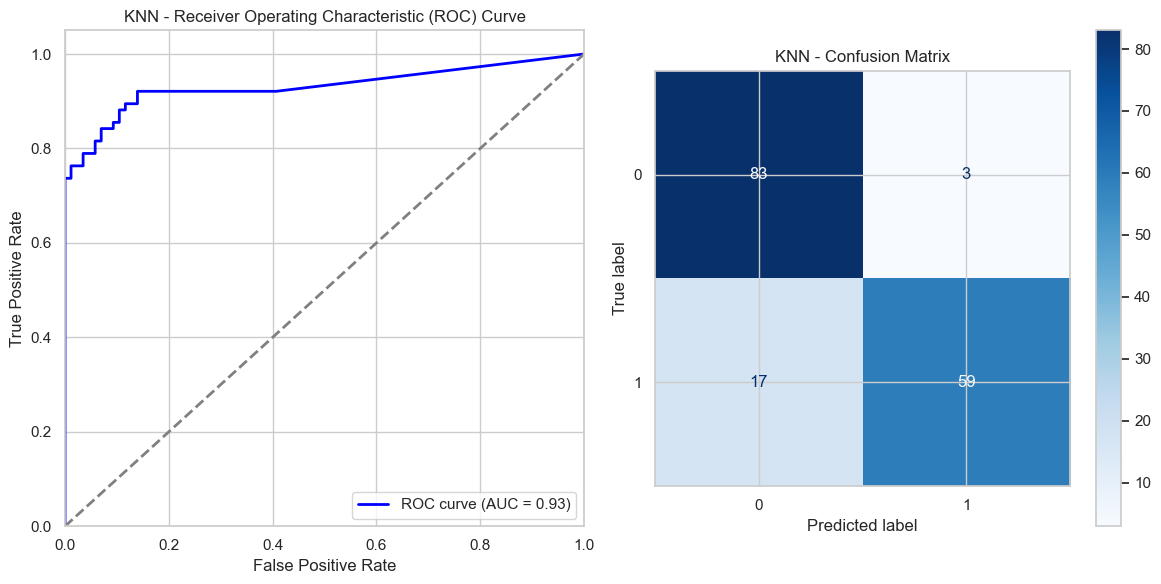

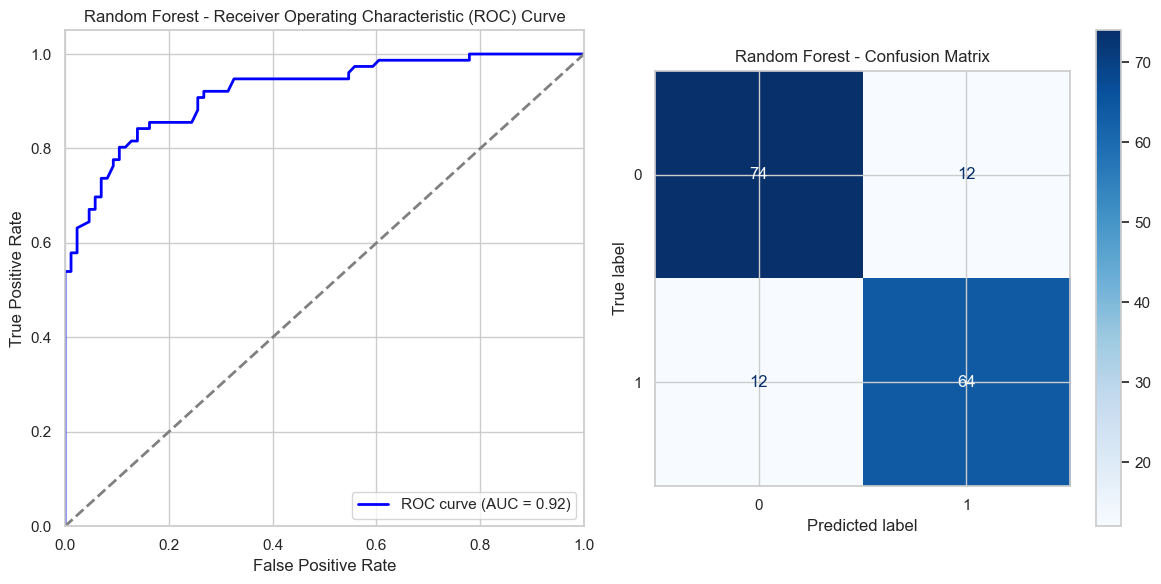

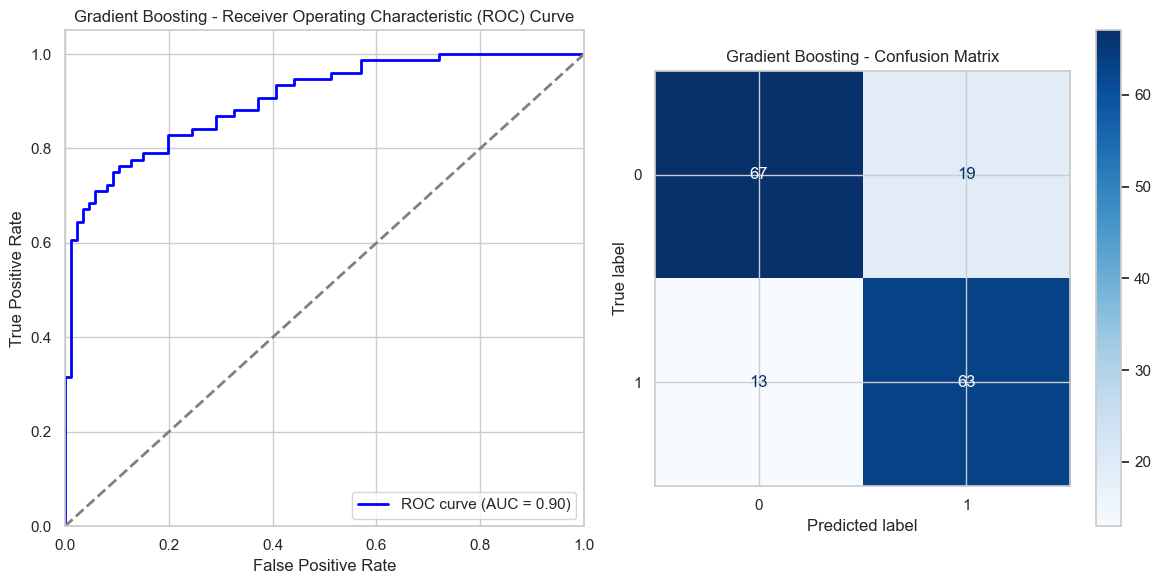

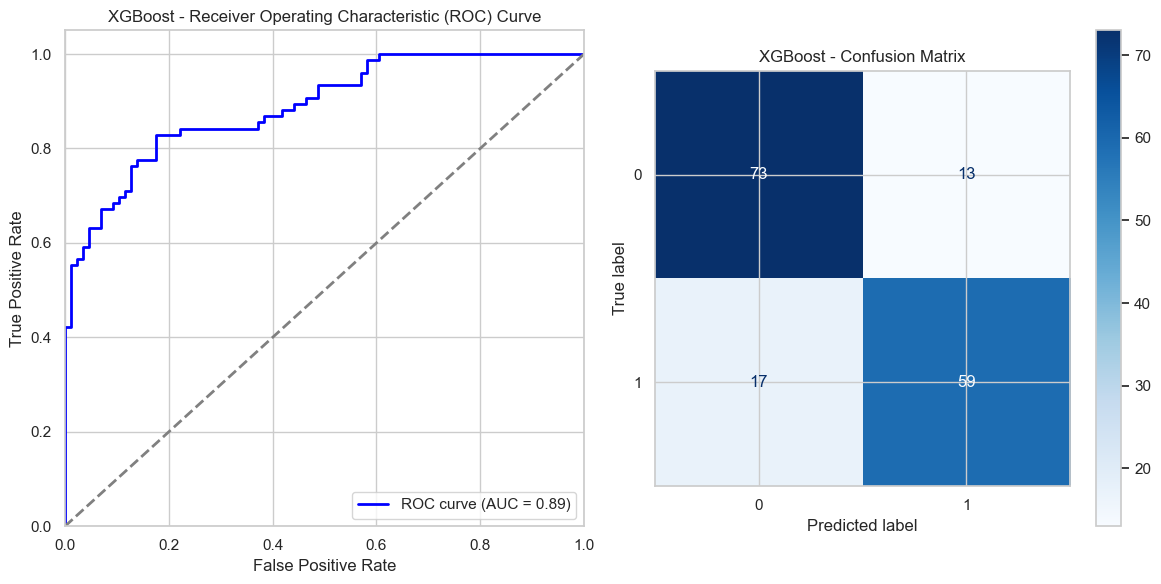

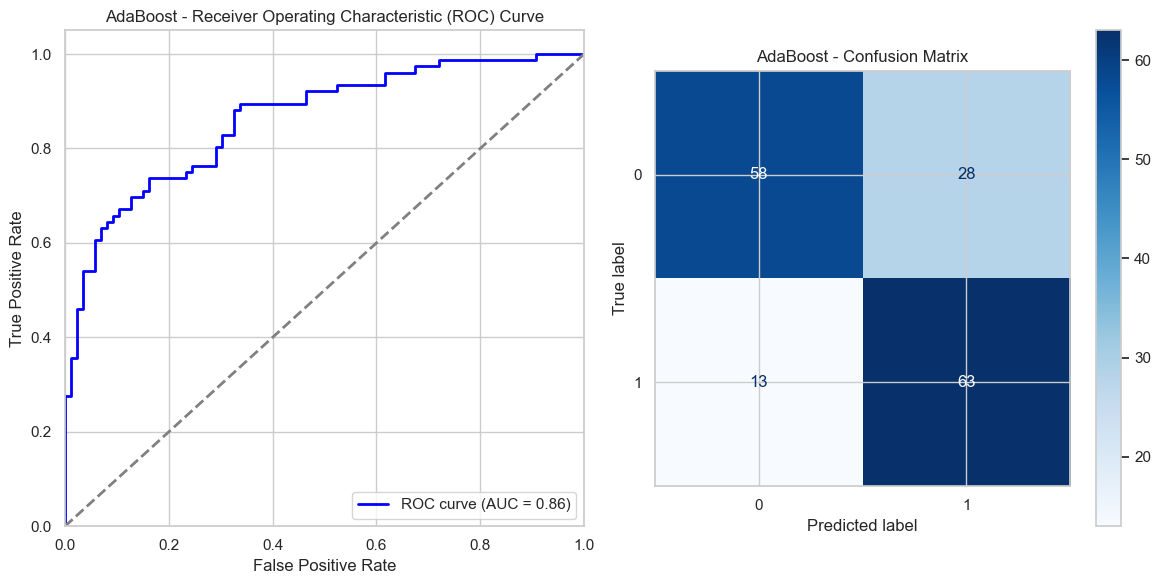

In [57]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay

def plot_auc_and_confusion_matrix(model, model_name, X_test, y_test):
    y_probs = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} - Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.grid(True)

    plt.subplot(1, 2, 2)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
    disp.plot(cmap='Blues', ax=plt.gca())
    plt.title(f'{model_name} - Confusion Matrix')

    plt.tight_layout()
    plt.show()

best_models = [best_lr, best_knn, best_rf, best_gbc, best_xgboost, best_adaboost]
model_names = ['Logistic Regression', 'KNN', 'Random Forest', 'Gradient Boosting', 'XGBoost', 'AdaBoost']

for model, name in zip(best_models, model_names):
    plot_auc_and_confusion_matrix(model, name, X_test, y_test)


# Liver Disease Prediction Model Comparison Report

## **Introduction**
This project aims to develop a robust machine learning model for predicting liver disease using a dataset comprising 583 records and 11 features. We evaluated and optimized several algorithms, including Logistic Regression, SVC, KNN, Random Forest, Gradient Boosting, XGBoost, and AdaBoost. The models were assessed based on metrics such as accuracy, precision, recall, F1-score, and ROC AUC to identify the most effective solution for medical settings. This report compares the models and recommends the best one for practical implementation.

---

## **Model Performance at a Glance**

| **Model**           | **Best Parameters**                            | **Accuracy** | **Precision (Class 0/1)** | **Recall (Class 0/1)** | **F1-Score (Class 0/1)** | **Mean ROC-AUC** | **Std. Dev (AUC)** |
|----------------------|-----------------------------------------------|--------------|---------------------------|------------------------|--------------------------|-------------------|--------------------|
| **Logistic Regression** | C=0.01, penalty='l2', solver='lbfgs'          | 0.74         | 0.71 / 0.79               | 0.86 / 0.61            | 0.78 / 0.69             | 0.7600            | 0.0523             |
| **SVC**              | C=1000, kernel='rbf', gamma='scale'           | 0.85         | 0.83 / 0.87               | 0.90 / 0.79            | 0.86 / 0.83             | 0.7077            | 0.0763             |
| **KNN**              | metric='manhattan', n_neighbors=3, weights='distance' | 0.88     | 0.83 / 0.95               | 0.97 / 0.78            | 0.89 / 0.86             | 0.8511            | 0.0684             |
| **Random Forest**    | max_depth=None, n_estimators=300              | 0.85         | 0.86 / 0.84               | 0.86 / 0.84            | 0.86 / 0.84             | 0.8907            | 0.0405             |
| **Gradient Boosting**| learning_rate=0.1, max_depth=5, n_estimators=200 | 0.80       | 0.84 / 0.77               | 0.78 / 0.83            | 0.81 / 0.80             | 0.7322            | 0.0643             |
| **XGBoost**          | max_depth=5, learning_rate=0.05, n_estimators=100 | 0.81       | 0.81 / 0.82               | 0.85 / 0.78            | 0.83 / 0.80             | 0.7832            | 0.0321             |
| **AdaBoost**         | base_estimator=DecisionTree(max_depth=3)      | 0.75         | 0.82 / 0.69               | 0.67 / 0.83            | 0.74 / 0.75             | 0.7987            | 0.0479             |

---

## **Key Evaluation Metrics**
- **Accuracy**: Indicates overall correctness of the model.
- **Precision**: Measures how many of the predicted cases were correct. Balanced scores for both classes are critical.
- **Recall**: Reflects the model's ability to identify all actual cases. 
- **F1-Score**: Harmonizes precision and recall into a single metric.
- **ROC-AUC**: Evaluates the model's ability to distinguish between classes. Higher values are better.
- **Standard Deviation (AUC)**: Lower values indicate stable and consistent performance.

---

## **Performance Highlights**

1. **Logistic Regression**:
   - Moderate accuracy.
   - Weak recall for class 1, limiting its ability to detect positive cases.

2. **SVC**:
   - High accuracy and balanced precision/recall.
   - ROC-AUC is slightly lower compared to Random Forest.

3. **KNN**:
   - Outstanding precision, recall, and F1-scores for class 1.
   - High overall performance with strong ROC-AUC.

4. **Random Forest**:
   - Most balanced performance across all metrics.
   - Achieves the highest ROC-AUC with minimal variability.

5. **Gradient Boosting**:
   - Moderate accuracy and performance.
   - Slightly lower ROC-AUC compared to top-performing models.

6. **XGBoost**:
   - Consistently balanced performance but doesn’t excel in any single metric.

7. **AdaBoost**:
   - Lower accuracy and imbalanced precision/recall compared to others.

---

## **Recommendation**

### **Top Contenders**:
1. **KNN**: Excels in identifying positive cases with superior precision and recall for class 1. Ideal for applications where minimizing false negatives is critical.
2. **Random Forest**: Delivers balanced and consistent performance, with the highest ROC-AUC and stability, making it the most reliable choice overall.

### **Final Recommendation**:
**Random Forest** is recommended as the best model due to its robust, well-rounded performance and suitability for practical use in medical diagnostics. It ensures accurate and balanced predictions for both classes while maintaining stability across various datasets.


# **Report on Challenges Faced and Techniques Used**

---

## **1. Lack of Column Names**
- **Challenge**: The dataset provided lacked column names, making it difficult to identify and interpret the features.  
- **Technique Used**:  
  - Manually assigned meaningful column names based on context and domain knowledge (e.g., `Age`, `Gender`, `Total Bilirubin`, `Direct Bilirubin`, etc.).  
- **Reason**: Proper column names improve the clarity and interpretability of the data, making it easier to perform analysis and communicate results.

---

## **2. Null Values in the Dataset**
- **Challenge**: The dataset contained two null entries, which could negatively affect model performance.  
- **Technique Used**:  
  - Dropped the null entries from the dataset.  
- **Reason**: The number of null values was minimal (<1%), and dropping them was a simple, effective solution to maintain data integrity without introducing potential inaccuracies from imputation.

---

## **3. Duplicate Entries**
- **Challenge**: The dataset had 13 duplicate entries, which could lead to biased model training and incorrect inferences.  
- **Technique Used**:  
  - Carefully reviewed duplicates and dropped 2 irrelevant ones while retaining meaningful duplicates based on domain relevance.  
- **Reason**: In medical datasets, some duplicates may represent critical cases or repeated observations. Selective removal ensured no loss of significant information.

---

## **4. Presence of Outliers**
- **Challenge**: Outliers were detected in the dataset, particularly in features such as bilirubin and enzyme levels, which can skew statistical analyses and model performance.  
- **Technique Used**:  
  - Instead of removing outliers, applied **Robust Scaling** to minimize their influence during modeling.  
- **Reason**: Outliers in medical data often represent extreme but valid conditions, and removing them could result in the loss of important information. Robust scaling standardized the data while preserving outlier significance.

---

## **5. Skewed Data Distribution**
- **Challenge**: Several features exhibited skewed distributions, which could hinder the performance of machine learning algorithms.  
- **Technique Used**:  
  - Applied **Logarithmic Transformation (log1p)** to normalize skewed data.  
- **Reason**: Log transformation helps reduce skewness, ensuring features are closer to a normal distribution, which improves model stability and accuracy.

---

## **6. Categorical Data Handling**
- **Challenge**: The dataset contained categorical variables, such as `Gender`, which are incompatible with most machine learning algorithms.  
- **Technique Used**:  
  - Converted categorical variables into numerical formats using **Label Encoding**.  
- **Reason**: Label encoding converts categories into numeric values, making them interpretable by machine learning models while preserving any ordinal relationships.

---

## **7. Imbalanced Target Variable**
- **Challenge**: The dataset had an imbalanced target variable, with one class significantly outnumbering the other. This imbalance could lead to biased predictions toward the majority class.  
- **Technique Used**:  
  - Employed **SMOTE (Synthetic Minority Oversampling Technique)** to balance the dataset.  
- **Reason**: SMOTE generates synthetic samples for the minority class, ensuring the dataset is balanced and improving the model's ability to predict both classes effectively.

---

## **Summary of Challenges and Resolutions**

| **Challenge**               | **Technique Used**            | **Reason**                                                                                  |  
|------------------------------|-------------------------------|---------------------------------------------------------------------------------------------|  
| Lack of column names         | Manual assignment             | To enhance interpretability and enable proper feature identification.                       |  
| Null values                 | Dropped null entries          | Minimal impact on dataset size while avoiding imputation bias.                              |  
| Duplicate entries           | Selective removal             | To preserve critical medical cases while eliminating redundancy.                            |  
| Outliers                    | Applied Robust Scaling         | Maintained data integrity while reducing the impact of extreme values.                      |  
| Skewed distributions        | Logarithmic Transformation     | To normalize data for better model compatibility.                                           |  
| Categorical variables       | Label Encoding                | Converted into numeric format for seamless processing by algorithms.                        |  
| Imbalanced dataset          | SMOTE                         | Balanced classes to improve prediction fairness and accuracy.                               |  

---

## **Conclusion**
The preprocessing challenges were effectively addressed using domain-specific techniques. This ensured the dataset was clean, balanced, and suitable for model development, leading to improved prediction accuracy and robustness.


# **Project Workflow Analysis**

---

## **1. Business Problem**  
The primary objective is to design a predictive model for liver disease diagnosis that can assist healthcare professionals by providing accurate and early predictions. This will enhance clinical decision-making and improve patient care.  

---

## **2. Domain Analysis**  
Liver disease is influenced by clinical and biochemical indicators, such as enzyme levels (SGPT, SGOT), bilirubin levels, age, and gender. These factors play a critical role in identifying liver conditions. The analysis incorporates domain-specific insights to ensure the model aligns with medical relevance.

---

## **3. Data Loading and Basic Checks**  
- **Dataset Overview**: Loaded the dataset containing 583 entries and 10 features.  
- **Basic Checks**: Conducted initial inspections using:  
  - `head()` and `tail()` to preview data.  
  - `shape` to confirm dataset dimensions.  
  - `info()` for data types and missing values.  
  - `describe()` to obtain summary statistics.

---

## **4. Exploratory Data Analysis (EDA)**  
### **Univariate Analysis**  
- Studied individual feature distributions to identify outliers and data skewness.  

### **Bivariate Analysis**  
- Explored the relationships between features and the target variable to uncover significant predictors.  

### **Multivariate Analysis**  
- Used correlation matrices to detect multicollinearity and relationships among features.

---

## **5. Data Preprocessing**  
- **Handling Null Values**: Dropped 4 null entries to maintain data quality.  
- **Duplicate Removal**: Checked and removed duplicate records to avoid redundancy.  
- **Outlier Handling**: Used statistical methods like IQR to address outliers.  
- **Log Transformation**: Applied to skewed features for normalization.  
- **Categorical Data Encoding**: Converted categorical variables into numerical formats (e.g., gender).  
- **Feature Selection**: Selected the most relevant features using correlation analysis and feature importance methods.

---

## **6. Data Scaling**  
- **Robust Scaling**: Standardized data using median and IQR to make it less sensitive to outliers while ensuring uniform scaling.

---

## **7. Model Creation**  
### **Data Preparation**  
- **Balancing Data**: Used techniques like SMOTE to handle class imbalance.  
- **Data Splitting**: Divided the dataset into training and testing sets (e.g., 70:30 split).  

### **Defining a Model-Building Function**  
- Created reusable functions to train models and evaluate them based on various metrics.  

### **Cross-Validation**  
- Applied cross-validation to ensure generalizability and robustness across different subsets of data.

---

## **8. Models and Tuning**  
- **Logistic Regression**:  
  - A baseline model, with hyperparameter tuning for regularization (`C`) and penalty.  
- **Support Vector Classifier (SVC)**:  
  - Optimized using grid search for parameters like `C`, `gamma`, and kernel type.  
- **Random Forest**:  
  - Tuned parameters such as `n_estimators` and `max_depth`.  
- **Gradient Boosting**:  
  - Adjusted `learning_rate`, `max_depth`, and `n_estimators` for better performance.  
- **XGBoost**:  
  - Leveraged advanced boosting techniques, tuning `learning_rate`, `max_depth`, and regularization parameters.  
- **AdaBoost**:  
  - Focused on weak learner optimization using base estimators and boosting rounds.

---

## **9. Model Evaluation Metrics**  
- **Precision, Recall, and F1-Score**: Balanced metrics to handle imbalanced classes effectively.  
- **ROC AUC**: Evaluated the model's ability to distinguish between positive and negative cases.  
- **Cross-Validation Scores**: Ensured consistent performance across different data splits.

---

## **10. Conclusion**  
The project followed a structured workflow from data understanding to model optimization. Key insights included the critical role of preprocessing, robust scaling, and hyperparameter tuning. Among the evaluated models, algorithms like SVC, XGBoost, and Random Forest showed the best performance in terms of precision and recall, aligning with the project's objectives for accurate and reliable predictions.  

--- 

## **11. Recommendations**  
- Enhance the dataset with additional samples for improved generalization.  
- Explore ensemble techniques to combine top-performing models.  
- Deploy the model and continuously update it with real-world data for sustained accuracy.  
